<a href="https://colab.research.google.com/github/RylieWeaver/NLP/blob/main/NLP_Take-Home_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Final (Take-home exam)

https://colab.research.google.com/drive/1zweS0k1k0kjurPzoxLlmXaIHWWXM_u6Z?usp=sharing

In alignment with the guidelines outlined in the class sessions, AI was used to help with: Explaining the meaning of dataset features / Explaining parts of code

# Setup

### Mount Drive

In [ ]:
# Setup access to my Google Drive
from google.colab import drive
drive.mount('/content/drive',  force_remount=True)

Mounted at /content/drive


In [ ]:
# Travel to NLP Directory
%cd "/content/drive/MyDrive/CGU/NLP"

/content/drive/MyDrive/CGU/NLP


In [ ]:
%ls

Final/   Lab1/  Lab3/    Lab3.2_extra/  Lab4/        Lab5/
Finall/  Lab2/  Lab3.2/  Lab3_extra/    Lab4_extra/  Lab5_extra/


### Pip

In [ ]:
!pip install pyspellchecker
!pip install gensim
!pip install transformers
!pip install textblob nltk
!pip install optuna
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.5 MB/s eta 0:00:00


### Explore Data

In [ ]:
import pandas as pd

updates_df = pd.read_csv('Final/Status Updates.csv')
profile_df = pd.read_csv('Final/Openness_w_profile_w_activity.csv')
liwc_df = pd.read_csv('Final/LIWC.csv')

In [ ]:
print(updates_df.shape)
updates_df.head()

(3000, 2)


,userid,message
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...


In [ ]:
# Check for duplicate userids
duplicates = updates_df['userid'].duplicated()
num_duplicates = duplicates.sum()
print(num_duplicates)

# There are no duplicates (meaning messages have already been grouped by userid)

0


In [ ]:
# Explore one message
row = updates_df.iloc[5,:]
test = row[1]
print(test)

is going to 21st IAVE World Volunteer Conference as Youth Volunteer Conference Participant. Anyone going?	is in CRANKY mode....	is on Ubuntu 10.10 now!	is looking forward for lots of things to happen in the future!	I should hav upgraded my phone's firmware!!! all data from phone lost!!!  forgive me if i asked for ur name if u sms-ed me!!	i pity your life for constantly placing urself in power struggles
Does the word "power" and "leader" seems so bright in ur eyes?	i love philippines mangoes!!!!!!	is going to attend a talk by Jim Rogers in Feb!!!!!!
Hope to hear a lot from his adventures!	is having a difficulty writing a formal letter in Indonesian. Walter Koh Charlie Kee Camilla Tandadjaja Wesley Djingga!! Do practice your indonesian. U'll never know how rusty it can be if u don't practice it after 4 years!


In [ ]:
print(profile_df.shape)
profile_df.head()

(3000, 14)


,userid,ope,ope_hl_bol,gender,age,locale,WC,n_like,n_status,n_event,n_group,n_work,n_education,n_tags
0,59a9bd425abebea3bd4a7673cd6f6778,4.40,1,0,24,en_US,2864,31.0,177.0,NaN,3.0,2.0,2.0,2.0
1,41aad64ae9d362e1a052fd6ae6ff438c,4.80,1,0,29,en_US,1018,30.0,45.0,NaN,1.0,1.0,1.0,NaN
2,6443ba9a045bb6aeb188770f49bf60e4,4.50,1,1,25,en_US,1791,21.0,123.0,NaN,7.0,1.0,NaN,36.0
3,822c5096b69ce005a143b34cfe80b9c5,4.75,1,1,16,en_US,7062,2581.0,312.0,NaN,10.0,NaN,1.0,44.0
4,c300aa5778178fa15c88e9dfa0427689,5.00,1,1,24,en_US,6907,193.0,412.0,2.0,28.0,3.0,2.0,637.0


In [ ]:
print(liwc_df.shape)
liwc_df.head()

(3000, 93)


,userid,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function.,pronoun,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,8f9d4ed5d16ed1a67d734196d29d1f6b,79.76,49.84,49.65,57.18,12.59,18.03,75.41,44.85,10.62,...,3.04,0.49,0.00,0.53,1.46,0.81,1.05,1.74,0.41,0.93
1,325e62f4e7e4f64a03fcf831a8d80bf1,32.33,40.50,57.82,80.53,9.39,13.53,91.90,56.25,16.76,...,2.27,0.07,0.00,1.85,1.92,0.14,0.00,1.10,0.00,0.07
2,d9d94cb467090189a08fb103b9cd5a0c,81.87,40.83,80.19,86.26,7.69,15.99,85.10,43.14,10.23,...,2.67,0.15,0.02,1.73,7.07,0.37,0.79,1.75,0.25,0.44
3,a7637e86876374b952f4d10d0513c350,63.11,53.43,72.23,72.35,9.00,14.59,83.71,47.35,12.71,...,3.51,0.48,0.10,0.86,2.80,1.75,1.00,2.87,1.42,1.28
4,c5898ecc4c7407e6f07cc3485073d3a6,85.73,60.94,23.37,18.00,12.84,22.80,72.31,40.05,8.69,...,4.65,1.92,0.12,0.94,0.57,1.67,2.12,2.98,0.98,2.28


# Part 1: Text Preprocessing

## Preprocess

### Initialize Columns

The reason I make all of these in an organized manner is both processed/unprocessed and tokens/text are used for different tasks in the assignment.

In [ ]:
# Initialize Columns
updates_df['message tokens'] = [['N/A']] * len(updates_df)
updates_df['cleaned message'] = 'N/A'
updates_df['cleaned message tokens'] = [['N/A']] * len(updates_df)
updates_df.head()

,userid,message,message tokens,cleaned message,cleaned message tokens
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,[N/A],N/A,[N/A]
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,[N/A],N/A,[N/A]
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,[N/A],N/A,[N/A]
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...,[N/A],N/A,[N/A]
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...,[N/A],N/A,[N/A]


### Tokenization

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# Function to convert string tokenized with POS tags
def tokenize(text):
  tokens = word_tokenize(text)
  return tokens

In [ ]:
# Test the tokenization
column = updates_df['message']
test = column[0]
print(test)
print("----------------------------------------------------------------------")
print(tokenize(test))

is still pissed that Eminem wasnt in the official Airplanes recording and mv.	is chillin' like a villain! "Livah." - omgpop Repomen ad.	I thought about putting up a cartoon character as my profile picture, but then I realized that doing so would absolutely do nothing. At all.	I sais shush girl. Shut'cho lips, dooo the Helen Keller, and talk with yo hipz.	I know too much Facebook is a bad thing, but skipping out on it for a week is suicide. Too much Starcraft 2 Beta. If you play, gimmeh your ign and lets roll.	I just watched Grilled Cheesus and cried. A lot. Shit, why do I cry so easily...	i got me a nu pic.	is a white washed filipino and a weeaboo.	I wore purple on accident.
----------------------------------------------------------------------
['is', 'still', 'pissed', 'that', 'Eminem', 'wasnt', 'in', 'the', 'official', 'Airplanes', 'recording', 'and', 'mv', '.', 'is', 'chillin', "'", 'like', 'a', 'villain', '!', '``', 'Livah', '.', "''", '-', 'omgpop', 'Repomen', 'ad', '.', 'I', 'tho

In [ ]:
updates_df['message tokens'] = updates_df['message'].apply(tokenize)

In [ ]:
# Check tokenization
updates_df.head()

,userid,message,message tokens,cleaned message,cleaned message tokens
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,"[is, still, pissed, that, Eminem, wasnt, in, t...",N/A,[N/A]
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,"[is, singing, today, and, is, a, little, nurvo...",N/A,[N/A]
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,"[I, had, a, wonderful, day, at, Anderson, I, a...",N/A,[N/A]
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...,"[i, like, it, on, the, floor, !, :, ), i, hope...",N/A,[N/A]
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...,"[is, about, to, make, some, moolah, !, I, need...",N/A,[N/A]


### POS Tag

In [ ]:
# Function to convert string tokenized with POS tags
def POS_tag(tokens):
  tagged = pos_tag(tokens)
  return tagged

In [ ]:
# Test the tokenization
column = updates_df['message tokens']
test = column[0]
print(test)
print("----------------------------------------------------------------------")
print(POS_tag(test))

['is', 'still', 'pissed', 'that', 'Eminem', 'wasnt', 'in', 'the', 'official', 'Airplanes', 'recording', 'and', 'mv', '.', 'is', 'chillin', "'", 'like', 'a', 'villain', '!', '``', 'Livah', '.', "''", '-', 'omgpop', 'Repomen', 'ad', '.', 'I', 'thought', 'about', 'putting', 'up', 'a', 'cartoon', 'character', 'as', 'my', 'profile', 'picture', ',', 'but', 'then', 'I', 'realized', 'that', 'doing', 'so', 'would', 'absolutely', 'do', 'nothing', '.', 'At', 'all', '.', 'I', 'sais', 'shush', 'girl', '.', "Shut'cho", 'lips', ',', 'dooo', 'the', 'Helen', 'Keller', ',', 'and', 'talk', 'with', 'yo', 'hipz', '.', 'I', 'know', 'too', 'much', 'Facebook', 'is', 'a', 'bad', 'thing', ',', 'but', 'skipping', 'out', 'on', 'it', 'for', 'a', 'week', 'is', 'suicide', '.', 'Too', 'much', 'Starcraft', '2', 'Beta', '.', 'If', 'you', 'play', ',', 'gimmeh', 'your', 'ign', 'and', 'lets', 'roll', '.', 'I', 'just', 'watched', 'Grilled', 'Cheesus', 'and', 'cried', '.', 'A', 'lot', '.', 'Shit', ',', 'why', 'do', 'I', 'cr

In [ ]:
updates_df['cleaned message tokens'] = updates_df['message tokens'].apply(POS_tag)

In [ ]:
# Check POS tagging
updates_df.head()

,userid,message,message tokens,cleaned message,cleaned message tokens
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,"[is, still, pissed, that, Eminem, wasnt, in, t...",N/A,"[(is, VBZ), (still, RB), (pissed, VBN), (that,..."
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,"[is, singing, today, and, is, a, little, nurvo...",N/A,"[(is, VBZ), (singing, VBG), (today, NN), (and,..."
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,"[I, had, a, wonderful, day, at, Anderson, I, a...",N/A,"[(I, PRP), (had, VBD), (a, DT), (wonderful, JJ..."
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...,"[i, like, it, on, the, floor, !, :, ), i, hope...",N/A,"[(i, NN), (like, IN), (it, PRP), (on, IN), (th..."
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...,"[is, about, to, make, some, moolah, !, I, need...",N/A,"[(is, VBZ), (about, IN), (to, TO), (make, VB),..."


### Lemmatization

In [ ]:
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def lemmatize(tagged_tokens):
  # Initialize objects
  wnl = WordNetLemmatizer()
  lemmatized_tokens = []

  # Lemmatize based on POS
  for word, tag in tagged_tokens:
    if tag.startswith('NN'):
      token = wnl.lemmatize(word, pos='n') # n is Noun
    elif tag.startswith('VB'):
      token = wnl.lemmatize(word, pos='v') # v is Verb
    elif tag.startswith('JJ'):
      token = wnl.lemmatize(word, pos='a') # a is Adjective
    elif tag.startswith('RB'):
      token = wnl.lemmatize(word, pos='r') # r is Adverb
    else:
      token = word

    # Append the lemma
    lemmatized_tokens.append(token)

  return lemmatized_tokens

In [ ]:
# Test the lemmatization
column = updates_df['cleaned message tokens']
test = column[0]
print(test)
print("----------------------------------------------------------------------")
print(lemmatize(test))

[('is', 'VBZ'), ('still', 'RB'), ('pissed', 'VBN'), ('that', 'IN'), ('Eminem', 'NNP'), ('wasnt', 'NN'), ('in', 'IN'), ('the', 'DT'), ('official', 'JJ'), ('Airplanes', 'NNP'), ('recording', 'NN'), ('and', 'CC'), ('mv', 'NN'), ('.', '.'), ('is', 'VBZ'), ('chillin', 'JJ'), ("'", "''"), ('like', 'IN'), ('a', 'DT'), ('villain', 'NN'), ('!', '.'), ('``', '``'), ('Livah', 'NNP'), ('.', '.'), ("''", "''"), ('-', ':'), ('omgpop', 'JJ'), ('Repomen', 'NNP'), ('ad', 'NN'), ('.', '.'), ('I', 'PRP'), ('thought', 'VBD'), ('about', 'RB'), ('putting', 'VBG'), ('up', 'RP'), ('a', 'DT'), ('cartoon', 'NN'), ('character', 'NN'), ('as', 'IN'), ('my', 'PRP$'), ('profile', 'JJ'), ('picture', 'NN'), (',', ','), ('but', 'CC'), ('then', 'RB'), ('I', 'PRP'), ('realized', 'VBD'), ('that', 'IN'), ('doing', 'VBG'), ('so', 'RB'), ('would', 'MD'), ('absolutely', 'RB'), ('do', 'VB'), ('nothing', 'NN'), ('.', '.'), ('At', 'IN'), ('all', 'DT'), ('.', '.'), ('I', 'PRP'), ('sais', 'VBP'), ('shush', 'JJ'), ('girl', 'NN'), (

In [ ]:
# Apply lemmatization to the DataFrame
updates_df['cleaned message tokens'] = updates_df['cleaned message tokens'].apply(lemmatize)

In [ ]:
# Check lemmatization
updates_df.head()

,userid,message,message tokens,cleaned message,cleaned message tokens
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,"[is, still, pissed, that, Eminem, wasnt, in, t...",N/A,"[be, still, piss, that, Eminem, wasnt, in, the..."
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,"[is, singing, today, and, is, a, little, nurvo...",N/A,"[be, sing, today, and, be, a, little, nurvous,..."
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,"[I, had, a, wonderful, day, at, Anderson, I, a...",N/A,"[I, have, a, wonderful, day, at, Anderson, I, ..."
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...,"[i, like, it, on, the, floor, !, :, ), i, hope...",N/A,"[i, like, it, on, the, floor, !, :, ), i, hope..."
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...,"[is, about, to, make, some, moolah, !, I, need...",N/A,"[be, about, to, make, some, moolah, !, I, need..."


### Normalization

In [ ]:
from nltk.corpus import stopwords
import re
nltk.download('stopwords')
from string import punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Load stopwords once (function was taking a long time?)
STOPWORDS = set(stopwords.words('english'))

# normalization function
def normalize_tokens(tokens):
    normalized_tokens = []

    for word in tokens:
        # Lowercase
        word = word.lower()

        # Remove digits and punctuation
        word = re.sub(r'[\d\W]+', '', word)

        # If the token is not a stopword, and its length is greater than 1, keep it
        if word and word not in STOPWORDS and len(word) > 1:
            normalized_tokens.append(word)

    return normalized_tokens

In [ ]:
# Test the normalization
column = updates_df['cleaned message tokens']
test = column[0]
print(test)
print("----------------------------------------------------------------------")
print(normalize_tokens(test))

['be', 'still', 'piss', 'that', 'Eminem', 'wasnt', 'in', 'the', 'official', 'Airplanes', 'recording', 'and', 'mv', '.', 'be', 'chillin', "'", 'like', 'a', 'villain', '!', '``', 'Livah', '.', "''", '-', 'omgpop', 'Repomen', 'ad', '.', 'I', 'think', 'about', 'put', 'up', 'a', 'cartoon', 'character', 'as', 'my', 'profile', 'picture', ',', 'but', 'then', 'I', 'realize', 'that', 'do', 'so', 'would', 'absolutely', 'do', 'nothing', '.', 'At', 'all', '.', 'I', 'sais', 'shush', 'girl', '.', "Shut'cho", 'lip', ',', 'dooo', 'the', 'Helen', 'Keller', ',', 'and', 'talk', 'with', 'yo', 'hipz', '.', 'I', 'know', 'too', 'much', 'Facebook', 'be', 'a', 'bad', 'thing', ',', 'but', 'skip', 'out', 'on', 'it', 'for', 'a', 'week', 'be', 'suicide', '.', 'Too', 'much', 'Starcraft', '2', 'Beta', '.', 'If', 'you', 'play', ',', 'gimmeh', 'your', 'ign', 'and', 'let', 'roll', '.', 'I', 'just', 'watch', 'Grilled', 'Cheesus', 'and', 'cry', '.', 'A', 'lot', '.', 'Shit', ',', 'why', 'do', 'I', 'cry', 'so', 'easily', '.

In [ ]:
# Apply normalization to the DataFrame
updates_df['cleaned message tokens'] = updates_df['cleaned message tokens'].apply(normalize_tokens)

In [ ]:
# Check normalization
updates_df.head()

,userid,message,message tokens,cleaned message,cleaned message tokens
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,"[is, still, pissed, that, Eminem, wasnt, in, t...",N/A,"[still, piss, eminem, wasnt, official, airplan..."
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,"[is, singing, today, and, is, a, little, nurvo...",N/A,"[sing, today, little, nurvous, please, pray, s..."
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,"[I, had, a, wonderful, day, at, Anderson, I, a...",N/A,"[wonderful, day, anderson, beat, good, beat, i..."
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...,"[i, like, it, on, the, floor, !, :, ), i, hope...",N/A,"[like, floor, hope, miss, little, bit, maybe, ..."
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...,"[is, about, to, make, some, moolah, !, I, need...",N/A,"[make, moolah, need, start, play, mafia, wars,..."


### Make Cleaned String

In [ ]:
# Join tokens to string
updates_df['cleaned message'] = updates_df['cleaned message tokens'].apply(lambda tokens: ' '.join(tokens))
updates_df.head()

,userid,message,message tokens,cleaned message,cleaned message tokens
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,"[is, still, pissed, that, Eminem, wasnt, in, t...",still piss eminem wasnt official airplanes rec...,"[still, piss, eminem, wasnt, official, airplan..."
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,"[is, singing, today, and, is, a, little, nurvo...",sing today little nurvous please pray send tho...,"[sing, today, little, nurvous, please, pray, s..."
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,"[I, had, a, wonderful, day, at, Anderson, I, a...",wonderful day anderson beat good beat importan...,"[wonderful, day, anderson, beat, good, beat, i..."
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...,"[i, like, it, on, the, floor, !, :, ), i, hope...",like floor hope miss little bit maybe reason c...,"[like, floor, hope, miss, little, bit, maybe, ..."
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...,"[is, about, to, make, some, moolah, !, I, need...",make moolah need start play mafia wars love da...,"[make, moolah, need, start, play, mafia, wars,..."


### Save

In [ ]:
%ls

Final/  Lab2/  Lab3.2/        Lab3_extra/  Lab4_extra/  Lab5_extra/
Lab1/   Lab3/  Lab3.2_extra/  Lab4/        Lab5/


In [ ]:
updates_df.to_csv('Final/cleaned_updates_df.csv', index=False)

## First 5 Table

### Make

In [ ]:
first5 = updates_df.iloc[:5,:].copy()
print(updates_df.shape, first5.shape)

(3000, 5) (5, 5)


In [ ]:
first5

,userid,message,message tokens,cleaned message,cleaned message tokens
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,"[is, still, pissed, that, Eminem, wasnt, in, t...",still piss eminem wasnt official airplanes rec...,"[still, piss, eminem, wasnt, official, airplan..."
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,"[is, singing, today, and, is, a, little, nurvo...",sing today little nurvous please pray send tho...,"[sing, today, little, nurvous, please, pray, s..."
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,"[I, had, a, wonderful, day, at, Anderson, I, a...",wonderful day anderson beat good beat importan...,"[wonderful, day, anderson, beat, good, beat, i..."
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...,"[i, like, it, on, the, floor, !, :, ), i, hope...",like floor hope miss little bit maybe reason c...,"[like, floor, hope, miss, little, bit, maybe, ..."
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...,"[is, about, to, make, some, moolah, !, I, need...",make moolah need start play mafia wars love da...,"[make, moolah, need, start, play, mafia, wars,..."


### Length

In [ ]:
def token_length(tokens):
  return len(tokens)

In [ ]:
first5['Message Length'] = first5['message tokens'].apply(token_length)
first5['Cleaned Message Length'] = first5['cleaned message tokens'].apply(token_length)

In [ ]:
first5

,userid,message,message tokens,cleaned message,cleaned message tokens,Message Length,Cleaned Message Length
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,"[is, still, pissed, that, Eminem, wasnt, in, t...",still piss eminem wasnt official airplanes rec...,"[still, piss, eminem, wasnt, official, airplan...",157,70
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,"[is, singing, today, and, is, a, little, nurvo...",sing today little nurvous please pray send tho...,"[sing, today, little, nurvous, please, pray, s...",2482,1040
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,"[I, had, a, wonderful, day, at, Anderson, I, a...",wonderful day anderson beat good beat importan...,"[wonderful, day, anderson, beat, good, beat, i...",672,283
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...,"[i, like, it, on, the, floor, !, :, ), i, hope...",like floor hope miss little bit maybe reason c...,"[like, floor, hope, miss, little, bit, maybe, ...",685,276
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...,"[is, about, to, make, some, moolah, !, I, need...",make moolah need start play mafia wars love da...,"[make, moolah, need, start, play, mafia, wars,...",1453,611


### Lexical Diversity

In [ ]:
def lexical_diversity(tokens):
    return len(set(tokens)) / len(tokens) if tokens else 0

In [ ]:
first5['Lexical Diversity'] = first5['cleaned message tokens'].apply(lexical_diversity)

In [ ]:
first5

,userid,message,message tokens,cleaned message,cleaned message tokens,Message Length,Cleaned Message Length,Lexical Diversity
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,"[is, still, pissed, that, Eminem, wasnt, in, t...",still piss eminem wasnt official airplanes rec...,"[still, piss, eminem, wasnt, official, airplan...",157,70,0.971429
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,"[is, singing, today, and, is, a, little, nurvo...",sing today little nurvous please pray send tho...,"[sing, today, little, nurvous, please, pray, s...",2482,1040,0.461538
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,"[I, had, a, wonderful, day, at, Anderson, I, a...",wonderful day anderson beat good beat importan...,"[wonderful, day, anderson, beat, good, beat, i...",672,283,0.657244
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...,"[i, like, it, on, the, floor, !, :, ), i, hope...",like floor hope miss little bit maybe reason c...,"[like, floor, hope, miss, little, bit, maybe, ...",685,276,0.673913
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...,"[is, about, to, make, some, moolah, !, I, need...",make moolah need start play mafia wars love da...,"[make, moolah, need, start, play, mafia, wars,...",1453,611,0.638298


### Misspells

In [ ]:
from spellchecker import SpellChecker
spell = SpellChecker()  # Initialize the spellcheck

def count_misspells(tokens):
    # Find misspelled words
    misspelled = spell.unknown(tokens)
    # Return count
    return len(misspelled)

In [ ]:
first5['Potential Misspells'] = first5['cleaned message tokens'].apply(count_misspells)

In [ ]:
first5

,userid,message,message tokens,cleaned message,cleaned message tokens,Message Length,Cleaned Message Length,Lexical Diversity,Potential Misspells
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,"[is, still, pissed, that, Eminem, wasnt, in, t...",still piss eminem wasnt official airplanes rec...,"[still, piss, eminem, wasnt, official, airplan...",157,70,0.971429,20
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,"[is, singing, today, and, is, a, little, nurvo...",sing today little nurvous please pray send tho...,"[sing, today, little, nurvous, please, pray, s...",2482,1040,0.461538,87
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,"[I, had, a, wonderful, day, at, Anderson, I, a...",wonderful day anderson beat good beat importan...,"[wonderful, day, anderson, beat, good, beat, i...",672,283,0.657244,13
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...,"[i, like, it, on, the, floor, !, :, ), i, hope...",like floor hope miss little bit maybe reason c...,"[like, floor, hope, miss, little, bit, maybe, ...",685,276,0.673913,20
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...,"[is, about, to, make, some, moolah, !, I, need...",make moolah need start play mafia wars love da...,"[make, moolah, need, start, play, mafia, wars,...",1453,611,0.638298,42


### Finalize



In [ ]:
# Prepare the table with the desired columns
table_df = first5[['Message Length', 'Cleaned Message Length', 'Lexical Diversity', 'Potential Misspells']].copy()

# Make index column with desired name
table_df.reset_index(inplace=True)
table_df.rename(columns={'index': 'Status Update Messages'}, inplace=True)

# Display the table
table_df.head()

,Status Update Messages,Message Length,Cleaned Message Length,Lexical Diversity,Potential Misspells
0,0,157,70,0.971429,20
1,1,2482,1040,0.461538,87
2,2,672,283,0.657244,13
3,3,685,276,0.673913,20
4,4,1453,611,0.638298,42


### Save

In [ ]:
%ls

Final/  Lab2/  Lab3.2/        Lab3_extra/  Lab4_extra/  Lab5_extra/
Lab1/   Lab3/  Lab3.2_extra/  Lab4/        Lab5/


In [ ]:
table_df.to_csv('Final/table.csv', index=False)

## Make Merged and Target DataFrames

In [ ]:
# Rename columns to identify later
profile_df = profile_df.rename(columns={col: f'profile_{col}' for col in profile_df.columns if col != 'userid'})
liwc_df = liwc_df.rename(columns={col: f'liwc_{col}' for col in liwc_df.columns if col != 'userid'})

In [ ]:
profile_df.head()

,userid,profile_ope,profile_ope_hl_bol,profile_gender,profile_age,profile_locale,profile_WC,profile_n_like,profile_n_status,profile_n_event,profile_n_group,profile_n_work,profile_n_education,profile_n_tags
0,59a9bd425abebea3bd4a7673cd6f6778,4.40,1,0,24,en_US,2864,31.0,177.0,NaN,3.0,2.0,2.0,2.0
1,41aad64ae9d362e1a052fd6ae6ff438c,4.80,1,0,29,en_US,1018,30.0,45.0,NaN,1.0,1.0,1.0,NaN
2,6443ba9a045bb6aeb188770f49bf60e4,4.50,1,1,25,en_US,1791,21.0,123.0,NaN,7.0,1.0,NaN,36.0
3,822c5096b69ce005a143b34cfe80b9c5,4.75,1,1,16,en_US,7062,2581.0,312.0,NaN,10.0,NaN,1.0,44.0
4,c300aa5778178fa15c88e9dfa0427689,5.00,1,1,24,en_US,6907,193.0,412.0,2.0,28.0,3.0,2.0,637.0


In [ ]:
liwc_df.head()

,userid,liwc_Analytic,liwc_Clout,liwc_Authentic,liwc_Tone,liwc_WPS,liwc_Sixltr,liwc_Dic,liwc_function.,liwc_pronoun,...,liwc_Comma,liwc_Colon,liwc_SemiC,liwc_QMark,liwc_Exclam,liwc_Dash,liwc_Quote,liwc_Apostro,liwc_Parenth,liwc_OtherP
0,8f9d4ed5d16ed1a67d734196d29d1f6b,79.76,49.84,49.65,57.18,12.59,18.03,75.41,44.85,10.62,...,3.04,0.49,0.00,0.53,1.46,0.81,1.05,1.74,0.41,0.93
1,325e62f4e7e4f64a03fcf831a8d80bf1,32.33,40.50,57.82,80.53,9.39,13.53,91.90,56.25,16.76,...,2.27,0.07,0.00,1.85,1.92,0.14,0.00,1.10,0.00,0.07
2,d9d94cb467090189a08fb103b9cd5a0c,81.87,40.83,80.19,86.26,7.69,15.99,85.10,43.14,10.23,...,2.67,0.15,0.02,1.73,7.07,0.37,0.79,1.75,0.25,0.44
3,a7637e86876374b952f4d10d0513c350,63.11,53.43,72.23,72.35,9.00,14.59,83.71,47.35,12.71,...,3.51,0.48,0.10,0.86,2.80,1.75,1.00,2.87,1.42,1.28
4,c5898ecc4c7407e6f07cc3485073d3a6,85.73,60.94,23.37,18.00,12.84,22.80,72.31,40.05,8.69,...,4.65,1.92,0.12,0.94,0.57,1.67,2.12,2.98,0.98,2.28


In [ ]:
merged_df = pd.merge(updates_df, profile_df, on='userid', how='inner')
merged_df = pd.merge(merged_df, liwc_df, on='userid', how='inner')
merged_df.head()

,userid,message,message tokens,cleaned message,cleaned message tokens,profile_ope,profile_ope_hl_bol,profile_gender,profile_age,profile_locale,...,liwc_Comma,liwc_Colon,liwc_SemiC,liwc_QMark,liwc_Exclam,liwc_Dash,liwc_Quote,liwc_Apostro,liwc_Parenth,liwc_OtherP
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,"[is, still, pissed, that, Eminem, wasnt, in, t...",still piss eminem wasnt official airplanes rec...,"[still, piss, eminem, wasnt, official, airplan...",4.63,1,0,18,en_US,...,4.70,0.46,0.13,3.14,3.72,1.83,4.70,2.81,1.70,1.63
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,"[is, singing, today, and, is, a, little, nurvo...",sing today little nurvous please pray send tho...,"[sing, today, little, nurvous, please, pray, s...",4.50,1,1,25,en_US,...,1.79,0.46,0.05,0.19,3.03,0.59,0.44,1.70,0.78,3.00
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,"[I, had, a, wonderful, day, at, Anderson, I, a...",wonderful day anderson beat good beat importan...,"[wonderful, day, anderson, beat, good, beat, i...",1.50,0,0,51,en_US,...,2.34,0.08,0.00,1.19,0.42,0.05,0.42,1.22,0.16,0.29
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...,"[i, like, it, on, the, floor, !, :, ), i, hope...",like floor hope miss little bit maybe reason c...,"[like, floor, hope, miss, little, bit, maybe, ...",4.50,1,1,19,en_US,...,4.09,0.59,0.06,0.51,5.76,0.54,0.45,4.29,0.00,0.71
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...,"[is, about, to, make, some, moolah, !, I, need...",make moolah need start play mafia wars love da...,"[make, moolah, need, start, play, mafia, wars,...",4.75,1,1,28,en_US,...,3.61,0.31,0.19,1.33,9.09,1.57,1.10,3.68,0.30,1.09


In [ ]:
user_target = merged_df[['userid', 'profile_ope', 'profile_ope_hl_bol']]
user_info = merged_df.drop(columns=['profile_ope', 'profile_ope_hl_bol'])

In [ ]:
user_info.head()

,userid,message,message tokens,cleaned message,cleaned message tokens,profile_gender,profile_age,profile_locale,profile_WC,profile_n_like,...,liwc_Comma,liwc_Colon,liwc_SemiC,liwc_QMark,liwc_Exclam,liwc_Dash,liwc_Quote,liwc_Apostro,liwc_Parenth,liwc_OtherP
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,"[is, still, pissed, that, Eminem, wasnt, in, t...",still piss eminem wasnt official airplanes rec...,"[still, piss, eminem, wasnt, official, airplan...",0,18,en_US,1531,61.0,...,4.70,0.46,0.13,3.14,3.72,1.83,4.70,2.81,1.70,1.63
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,"[is, singing, today, and, is, a, little, nurvo...",sing today little nurvous please pray send tho...,"[sing, today, little, nurvous, please, pray, s...",1,25,en_US,7431,88.0,...,1.79,0.46,0.05,0.19,3.03,0.59,0.44,1.70,0.78,3.00
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,"[I, had, a, wonderful, day, at, Anderson, I, a...",wonderful day anderson beat good beat importan...,"[wonderful, day, anderson, beat, good, beat, i...",0,51,en_US,3768,22.0,...,2.34,0.08,0.00,1.19,0.42,0.05,0.42,1.22,0.16,0.29
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...,"[i, like, it, on, the, floor, !, :, ), i, hope...",like floor hope miss little bit maybe reason c...,"[like, floor, hope, miss, little, bit, maybe, ...",1,19,en_US,3543,332.0,...,4.09,0.59,0.06,0.51,5.76,0.54,0.45,4.29,0.00,0.71
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...,"[is, about, to, make, some, moolah, !, I, need...",make moolah need start play mafia wars love da...,"[make, moolah, need, start, play, mafia, wars,...",1,28,en_US,11155,178.0,...,3.61,0.31,0.19,1.33,9.09,1.57,1.10,3.68,0.30,1.09


In [ ]:
user_target.head()

,userid,profile_ope,profile_ope_hl_bol
0,0003e82099f3087d16b301104330547c,4.63,1
1,001494c3b74f124a2e3435fff17f376b,4.50,1
2,00257e647892d77d5f9b4c33a664e6f7,1.50,0
3,002bc06dc29c9ebd31ea3d40d4e13861,4.50,1
4,004ed92354145c51355bd757a0733b1a,4.75,1


### Save

In [ ]:
%ls

Final/  Lab2/  Lab3.2/        Lab3_extra/  Lab4_extra/  Lab5_extra/
Lab1/   Lab3/  Lab3.2_extra/  Lab4/        Lab5/


In [ ]:
user_info.to_csv('Final/user_info.csv', index=False)
user_target.to_csv('Final/user_target.csv', index=False)

# Part 2: Feature Engineering

## Load

In case starting again and not wanting to re-run preprocessing (checkpoint)

In [ ]:
import pandas as pd

user_info = pd.read_csv('Final/user_info.csv')
user_target = pd.read_csv('Final/user_target.csv')

In [ ]:
user_info.head()

,userid,message,message tokens,cleaned message,cleaned message tokens,profile_gender,profile_age,profile_locale,profile_WC,profile_n_like,...,liwc_Comma,liwc_Colon,liwc_SemiC,liwc_QMark,liwc_Exclam,liwc_Dash,liwc_Quote,liwc_Apostro,liwc_Parenth,liwc_OtherP
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,"['is', 'still', 'pissed', 'that', 'Eminem', 'w...",still piss eminem wasnt official airplanes rec...,"['still', 'piss', 'eminem', 'wasnt', 'official...",0,18,en_US,1531,61.0,...,4.70,0.46,0.13,3.14,3.72,1.83,4.70,2.81,1.70,1.63
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,"['is', 'singing', 'today', 'and', 'is', 'a', '...",sing today little nurvous please pray send tho...,"['sing', 'today', 'little', 'nurvous', 'please...",1,25,en_US,7431,88.0,...,1.79,0.46,0.05,0.19,3.03,0.59,0.44,1.70,0.78,3.00
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,"['I', 'had', 'a', 'wonderful', 'day', 'at', 'A...",wonderful day anderson beat good beat importan...,"['wonderful', 'day', 'anderson', 'beat', 'good...",0,51,en_US,3768,22.0,...,2.34,0.08,0.00,1.19,0.42,0.05,0.42,1.22,0.16,0.29
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...,"['i', 'like', 'it', 'on', 'the', 'floor', '!',...",like floor hope miss little bit maybe reason c...,"['like', 'floor', 'hope', 'miss', 'little', 'b...",1,19,en_US,3543,332.0,...,4.09,0.59,0.06,0.51,5.76,0.54,0.45,4.29,0.00,0.71
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...,"['is', 'about', 'to', 'make', 'some', 'moolah'...",make moolah need start play mafia wars love da...,"['make', 'moolah', 'need', 'start', 'play', 'm...",1,28,en_US,11155,178.0,...,3.61,0.31,0.19,1.33,9.09,1.57,1.10,3.68,0.30,1.09


In [ ]:
user_target.head()

,userid,profile_ope,profile_ope_hl_bol
0,0003e82099f3087d16b301104330547c,4.63,1
1,001494c3b74f124a2e3435fff17f376b,4.50,1
2,00257e647892d77d5f9b4c33a664e6f7,1.50,0
3,002bc06dc29c9ebd31ea3d40d4e13861,4.50,1
4,004ed92354145c51355bd757a0733b1a,4.75,1


## Tf-idf

In [ ]:
# Collect corpus to make tf-idf vectorizer
corpus = user_info['cleaned message'].tolist()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transorm for features
tfidf_matrix = vectorizer.fit_transform(corpus)
tfidf_features = vectorizer.fit_transform(user_info['cleaned message'])

In [ ]:
# Create the feature names, which correspond to tf-idf(word)
feature_names = vectorizer.get_feature_names_out()
new_column_names = [f"tf-idf({word})" for word in feature_names]

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=new_column_names)

# Concat features with DataFrame
# user_info = pd.concat([user_info.reset_index(drop=True), tfidf_df], axis=1)
# user_info.head()

In [ ]:
tfidf_df.head()

,tf-idf(able),tf-idf(absolutely),tf-idf(accept),tf-idf(across),tf-idf(act),tf-idf(actually),tf-idf(add),tf-idf(addict),tf-idf(admit),tf-idf(afraid),...,tf-idf(yeah),tf-idf(year),tf-idf(yell),tf-idf(yes),tf-idf(yesterday),tf-idf(yet),tf-idf(yo),tf-idf(young),tf-idf(youtube),tf-idf(yu)
0,0.000000,0.216930,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.25959,0.0,0.0,0.0
1,0.020717,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.02026,0.000000,0.018021,0.00000,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.152425,0.0,0.099830,0.000000,0.0,0.0,0.0,...,0.0,0.114433,0.0,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.0
3,0.000000,0.071872,0.0,0.000000,0.0,0.054456,0.000000,0.0,0.0,0.0,...,0.0,0.124844,0.0,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.0
4,0.000000,0.044678,0.0,0.000000,0.0,0.033852,0.046084,0.0,0.0,0.0,...,0.0,0.103475,0.0,0.00000,0.036247,0.000000,0.00000,0.0,0.0,0.0


### Save

Because it's not used later, I save instead of concatting

In [ ]:
%ls

Final/  Lab2/  Lab3.2/        Lab3_extra/  Lab4_extra/  Lab5_extra/
Lab1/   Lab3/  Lab3.2_extra/  Lab4/        Lab5/


In [ ]:
tfidf_df.to_csv('Final/tf-idf.csv', index=False)

## GloVe

In [ ]:
import gensim.downloader as api

In [ ]:
# Show Available Models
print(*list(api.info()['models'].keys()), sep='\n')

fasttext-wiki-news-subwords-300
conceptnet-numberbatch-17-06-300
word2vec-ruscorpora-300
word2vec-google-news-300
glove-wiki-gigaword-50
glove-wiki-gigaword-100
glove-wiki-gigaword-200
glove-wiki-gigaword-300
glove-twitter-25
glove-twitter-50
glove-twitter-100
glove-twitter-200
__testing_word2vec-matrix-synopsis


In [ ]:
# Load Desired Vectors
glove_model = api.load('glove-twitter-100')

[==================================================] 100.0% 387.1/387.1MB downloaded


In [ ]:
# Check Load (ramen)

# Similar Words
similar_words = glove_model.most_similar('ramen')
print(similar_words)

# Access the vector for a specific word
ramen_vector = glove_model['ramen']
print(ramen_vector)

[('noodles', 0.8428024649620056), ('sushi', 0.7480054497718811), ('noodle', 0.7342357635498047), ('soup', 0.7012260556221008), ('teriyaki', 0.6987793445587158), ('chicken', 0.6893733143806458), ('kimchi', 0.687961220741272), ('miso', 0.6854868531227112), ('burger', 0.6820231080055237), ('fries', 0.6777812242507935)]
[-0.58448  -0.22794   0.25357   0.13568   0.078292  0.15644   0.088496
  0.72506   0.52924  -0.49537  -0.54775  -0.11686  -1.7174   -0.20832
 -0.6422    0.5885    0.95252  -0.53695  -0.63248   0.12616  -0.18232
  0.60459  -0.25936  -0.38868   0.28473   0.26453   0.77626  -1.1677
  0.19862   0.070057 -0.669     0.21888  -0.13351  -0.32362  -0.47285
 -1.157     0.098789  0.32491   1.0632    1.2676   -0.75698   0.70152
 -0.48496   0.44807   0.64322   0.28419  -0.62096   1.0169    0.28115
  0.13971  -0.22288   0.10997  -0.31311   0.90501  -0.088286 -0.59945
  0.28804  -0.8801    0.24172   0.40449  -0.049906 -0.99038  -0.18109
  0.41431  -0.019143 -0.9201    0.34201  -0.28425  -

In [ ]:
# Check for Missing Words to see if concerning
total_token_count = 0
non_embedded_token_count = 0
unique_non_embedded_tokens = set()

# Iterate through token lists
for tokens_list in user_info['cleaned message']:
    # Update the total token count
    total_token_count += len(tokens_list)
    # Check each token
    for token in tokens_list:
        if token not in glove_model.key_to_index:
            # Increment and add to set
            non_embedded_token_count += 1
            unique_non_embedded_tokens.add(token)

# Calculate percentage missing
percent_without_embeddings = (non_embedded_token_count / total_token_count) * 100

# Get 10 unique missing
unique_non_embedded_examples = list(unique_non_embedded_tokens)[:10]

print(f"Total tokens: {total_token_count}")
print(f"Tokens without embeddings: {non_embedded_token_count}")
print(f"Percent of tokens without embeddings: {percent_without_embeddings:.2f}%")
print(f"Unique non-embedded tokens: {len(unique_non_embedded_tokens)}")
print("Examples of unique non-embedded tokens:", unique_non_embedded_examples)

Total tokens: 3966066
Tokens without embeddings: 664144
Percent of tokens without embeddings: 16.75%
Unique non-embedded tokens: 1
Examples of unique non-embedded tokens: [' ']


There is a high percentage of non-embedded tokens, but as we can see they're all just spaces. This is not concerning and we can proceed...

In [ ]:
import numpy as np

def GloVe_embed(document_tokens, glove_model):
    # Initialize an empty list to store word embeddings (will average)
    embeddings = []

    for word in document_tokens:
        if word in glove_model.key_to_index:  # Check if the word is in the model's vocabulary
            embeddings.append(glove_model[word])  # Add the word's embedding to the list

    # Check for embeddings and compute mean if so
    if embeddings:
        document_embedding = np.mean(embeddings, axis=0)
    else:
        # If no embeddings were found, return a zero vector
        document_embedding = np.zeros(100)

    return document_embedding

In [ ]:
# Make GloVe embeddings
embeddings_list = updates_df['cleaned message'].apply(lambda tokens: GloVe_embed(tokens, glove_model)).tolist()

# Create column names
embedding_dim = 100
column_names = [f'GloVe({i})' for i in range(embedding_dim)]

# Create DataFrame
embeddings_df = pd.DataFrame(embeddings_list, columns=column_names)

In [ ]:
print(embeddings_df.shape)
embeddings_df.head()

(3000, 100)


,GloVe(0),GloVe(1),GloVe(2),GloVe(3),GloVe(4),GloVe(5),GloVe(6),GloVe(7),GloVe(8),GloVe(9),...,GloVe(90),GloVe(91),GloVe(92),GloVe(93),GloVe(94),GloVe(95),GloVe(96),GloVe(97),GloVe(98),GloVe(99)
0,0.232440,0.056230,-0.000044,-0.134390,-0.088302,0.099625,-0.437931,0.026799,-0.307008,0.230946,...,0.162159,-0.189214,-0.011111,0.087449,0.242983,-0.506191,-0.399626,-0.008952,0.226084,-0.330831
1,0.221551,0.026137,0.017373,-0.146981,-0.067827,0.129435,-0.413776,0.043031,-0.308727,0.233274,...,0.158703,-0.202478,-0.027180,0.099649,0.249396,-0.504336,-0.386281,-0.003201,0.213195,-0.331630
2,0.219169,0.025704,0.018121,-0.141727,-0.069726,0.131306,-0.411150,0.044333,-0.331537,0.236840,...,0.166701,-0.197055,-0.041304,0.106950,0.254570,-0.506244,-0.392825,0.001109,0.222402,-0.325307
3,0.242005,0.025198,0.008547,-0.126076,-0.071946,0.134997,-0.417096,0.033762,-0.322002,0.194773,...,0.187549,-0.193366,-0.038125,0.099714,0.269935,-0.510008,-0.406905,-0.019750,0.205803,-0.329174
4,0.217269,0.011950,0.044207,-0.129619,-0.063490,0.130905,-0.386209,0.027793,-0.318201,0.221260,...,0.177681,-0.190458,-0.055318,0.104869,0.265807,-0.497814,-0.409003,-0.011813,0.239677,-0.329365


In [ ]:
# Concatenate the original DataFrame with the embeddings DataFrame
user_info = pd.concat([user_info.reset_index(drop=True), embeddings_df.reset_index(drop=True)], axis=1)

In [ ]:
# Check DataFrame
print(user_info.shape)
user_info.head()

(3000, 208)


,userid,message,message tokens,cleaned message,cleaned message tokens,profile_gender,profile_age,profile_locale,profile_WC,profile_n_like,...,GloVe(90),GloVe(91),GloVe(92),GloVe(93),GloVe(94),GloVe(95),GloVe(96),GloVe(97),GloVe(98),GloVe(99)
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,"['is', 'still', 'pissed', 'that', 'Eminem', 'w...",still piss eminem wasnt official airplanes rec...,"['still', 'piss', 'eminem', 'wasnt', 'official...",0,18,en_US,1531,61.0,...,0.162159,-0.189214,-0.011111,0.087449,0.242983,-0.506191,-0.399626,-0.008952,0.226084,-0.330831
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,"['is', 'singing', 'today', 'and', 'is', 'a', '...",sing today little nurvous please pray send tho...,"['sing', 'today', 'little', 'nurvous', 'please...",1,25,en_US,7431,88.0,...,0.158703,-0.202478,-0.027180,0.099649,0.249396,-0.504336,-0.386281,-0.003201,0.213195,-0.331630
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,"['I', 'had', 'a', 'wonderful', 'day', 'at', 'A...",wonderful day anderson beat good beat importan...,"['wonderful', 'day', 'anderson', 'beat', 'good...",0,51,en_US,3768,22.0,...,0.166701,-0.197055,-0.041304,0.106950,0.254570,-0.506244,-0.392825,0.001109,0.222402,-0.325307
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...,"['i', 'like', 'it', 'on', 'the', 'floor', '!',...",like floor hope miss little bit maybe reason c...,"['like', 'floor', 'hope', 'miss', 'little', 'b...",1,19,en_US,3543,332.0,...,0.187549,-0.193366,-0.038125,0.099714,0.269935,-0.510008,-0.406905,-0.019750,0.205803,-0.329174
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...,"['is', 'about', 'to', 'make', 'some', 'moolah'...",make moolah need start play mafia wars love da...,"['make', 'moolah', 'need', 'start', 'play', 'm...",1,28,en_US,11155,178.0,...,0.177681,-0.190458,-0.055318,0.104869,0.265807,-0.497814,-0.409003,-0.011813,0.239677,-0.329365


### Save

Because switching to gpu will take resetting runtime

In [ ]:
%ls

Final/  Lab2/  Lab3.2/        Lab3_extra/  Lab4_extra/  Lab5_extra/
Lab1/   Lab3/  Lab3.2_extra/  Lab4/        Lab5/


In [ ]:
user_info.to_csv('Final/b4_longformer.csv', index=False)

## Longformer

### Load

Because changing to gpu restarts runtime I'll need to re-read and import

In [ ]:
import pandas as pd
import numpy as np

user_info = pd.read_csv('Final/b4_longformer.csv')
user_info.head()

,userid,message,message tokens,cleaned message,cleaned message tokens,profile_gender,profile_age,profile_locale,profile_WC,profile_n_like,...,GloVe(90),GloVe(91),GloVe(92),GloVe(93),GloVe(94),GloVe(95),GloVe(96),GloVe(97),GloVe(98),GloVe(99)
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,"['is', 'still', 'pissed', 'that', 'Eminem', 'w...",still piss eminem wasnt official airplanes rec...,"['still', 'piss', 'eminem', 'wasnt', 'official...",0,18,en_US,1531,61.0,...,0.162159,-0.189214,-0.011111,0.087449,0.242983,-0.506191,-0.399626,-0.008952,0.226084,-0.330831
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,"['is', 'singing', 'today', 'and', 'is', 'a', '...",sing today little nurvous please pray send tho...,"['sing', 'today', 'little', 'nurvous', 'please...",1,25,en_US,7431,88.0,...,0.158703,-0.202478,-0.027180,0.099650,0.249396,-0.504336,-0.386281,-0.003201,0.213195,-0.331630
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,"['I', 'had', 'a', 'wonderful', 'day', 'at', 'A...",wonderful day anderson beat good beat importan...,"['wonderful', 'day', 'anderson', 'beat', 'good...",0,51,en_US,3768,22.0,...,0.166701,-0.197055,-0.041304,0.106950,0.254570,-0.506244,-0.392825,0.001109,0.222402,-0.325307
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...,"['i', 'like', 'it', 'on', 'the', 'floor', '!',...",like floor hope miss little bit maybe reason c...,"['like', 'floor', 'hope', 'miss', 'little', 'b...",1,19,en_US,3543,332.0,...,0.187549,-0.193366,-0.038125,0.099714,0.269935,-0.510008,-0.406905,-0.019750,0.205803,-0.329174
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...,"['is', 'about', 'to', 'make', 'some', 'moolah'...",make moolah need start play mafia wars love da...,"['make', 'moolah', 'need', 'start', 'play', 'm...",1,28,en_US,11155,178.0,...,0.177681,-0.190458,-0.055318,0.104869,0.265807,-0.497814,-0.409003,-0.011813,0.239677,-0.329365


### Initial Setup

In [ ]:
# Load Longformer
from transformers import LongformerTokenizer, LongformerModel
import torch

longform_tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')
longform_model = LongformerModel.from_pretrained('allenai/longformer-base-4096')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/597M [00:00<?, ?B/s]

In [ ]:
import logging
# Set logging level to ERROR to mute informational messages
logging.getLogger("transformers").setLevel(logging.ERROR)

### Computation Setup

In [ ]:
# Check if GPU is available and set computational device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [ ]:
# Move model to the selected device
longform_model.to(device)

LongformerModel(
  (embeddings): LongformerEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (position_embeddings): Embedding(4098, 768, padding_idx=1)
  )
  (encoder): LongformerEncoder(
    (layer): ModuleList(
      (0-11): 12 x LongformerLayer(
        (attention): LongformerAttention(
          (self): LongformerSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (query_global): Linear(in_features=768, out_features=768, bias=True)
            (key_global): Linear(in_features=768, out_features=768, bias=True)
            (value_global): Linear(in_features=768, out_features=768, bias=True)
          )
    

In [ ]:
# Enforce that the model is in evaluation mode
longform_model.eval()

LongformerModel(
  (embeddings): LongformerEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (position_embeddings): Embedding(4098, 768, padding_idx=1)
  )
  (encoder): LongformerEncoder(
    (layer): ModuleList(
      (0-11): 12 x LongformerLayer(
        (attention): LongformerAttention(
          (self): LongformerSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (query_global): Linear(in_features=768, out_features=768, bias=True)
            (key_global): Linear(in_features=768, out_features=768, bias=True)
            (value_global): Linear(in_features=768, out_features=768, bias=True)
          )
    

### Embed

In [ ]:
# For progress bars
from tqdm import tqdm

In [ ]:
def Longform_embeddings(df, batch_size=16):
    embeddings = []  # To store embeddings

    # Process in batches
    for i in tqdm(range(0, len(df), batch_size)):
        batch = df[i:i+batch_size]

        # Make inputs
        inputs = longform_tokenizer(
            batch.tolist(),  # Convert batch to list
            padding=True,  # Apply padding
            truncation=True,  # Apply truncation
            add_special_tokens=True,  # Add special tokens
            return_tensors="pt",  # Return PyTorch tensors
            max_length=512,  # Max token length
            return_attention_mask=True  # Generate attention masks
        )

        # Create a global attention mask for Longformer
        global_attention_mask = torch.zeros_like(inputs['input_ids'])  # Same shape as input_ids
        global_attention_mask[:, 0] = 1  # Set global attention on the first token

        # Move inputs to the same device as the model
        inputs = inputs.to(device)
        global_attention_mask = global_attention_mask.to(device)

        # Inference without gradients
        with torch.no_grad():
            outputs = longform_model(**inputs, global_attention_mask=global_attention_mask)

        # Mean pooling - compute the mean of the last hidden states
        attention_mask = inputs['attention_mask']
        input_mask_expanded = attention_mask.unsqueeze(-1).expand(outputs.last_hidden_state.size()).float()
        sum_embeddings = torch.sum(outputs.last_hidden_state * input_mask_expanded, 1)
        sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
        mean_pooled_embeddings = sum_embeddings / sum_mask

        # Append batch embeddings
        embeddings.append(mean_pooled_embeddings.cpu().numpy())

    # Concatenate all batch embeddings
    embeddings = np.concatenate(embeddings, axis=0)
    return embeddings

In [ ]:
# Make embeddings in batches and observe time
%%time
embeddings = Longform_embeddings(user_info['cleaned message'])

100%|██████████| 188/188 [01:03<00:00,  2.97it/s]

CPU times: user 58.9 s, sys: 230 ms, total: 59.1 s
Wall time: 1min 3s


In [ ]:
# Add to DataFrame

# Make column names
embedding_dim = embeddings.shape[1]
column_names = [f'Longform({i})' for i in range(embedding_dim)]

# Create Embeddings DataFrame
embeddings_df = pd.DataFrame(embeddings, columns=column_names)
embeddings_df.head()

,Longform(0),Longform(1),Longform(2),Longform(3),Longform(4),Longform(5),Longform(6),Longform(7),Longform(8),Longform(9),...,Longform(758),Longform(759),Longform(760),Longform(761),Longform(762),Longform(763),Longform(764),Longform(765),Longform(766),Longform(767)
0,0.024415,-0.073675,0.083832,0.037962,-0.147602,-0.168909,0.098059,0.011755,0.090692,0.022772,...,0.037956,-0.034081,-0.126294,-0.049998,-0.159850,-0.080478,0.442372,-0.393749,-0.026991,-0.042139
1,-0.005017,-0.091407,0.186433,0.423396,-0.018279,-0.253361,0.159522,0.104332,0.144955,0.147279,...,-0.040673,0.024327,-0.073384,0.098353,-0.182571,0.029648,0.587017,-0.434201,0.010119,0.057981
2,-0.000704,-0.071087,0.166465,0.287549,0.003656,-0.173357,0.128514,0.095260,0.172120,0.030947,...,-0.048986,0.025647,-0.067190,0.115309,-0.200020,0.054418,0.478723,-0.286935,-0.001591,0.114993
3,-0.044506,-0.091669,0.147273,0.254693,-0.071697,-0.197370,0.189061,0.261237,0.146673,0.022440,...,0.080972,0.014423,-0.133403,0.067971,-0.185953,-0.012492,0.523919,-0.370653,0.091308,-0.023970
4,0.021190,-0.123137,0.174675,0.298595,-0.185639,-0.354375,0.186115,0.160282,0.151893,0.033991,...,-0.024671,0.046818,-0.064787,0.076012,-0.251376,-0.018756,0.502822,-0.370936,-0.033058,0.084840


In [ ]:
# Concatenate
user_info = pd.concat([user_info.reset_index(drop=True), embeddings_df.reset_index(drop=True)], axis=1)

In [ ]:
# Check the DataFrame
print(user_info.shape)
user_info.head()

(3000, 976)


,userid,message,message tokens,cleaned message,cleaned message tokens,profile_gender,profile_age,profile_locale,profile_WC,profile_n_like,...,Longform(758),Longform(759),Longform(760),Longform(761),Longform(762),Longform(763),Longform(764),Longform(765),Longform(766),Longform(767)
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,"['is', 'still', 'pissed', 'that', 'Eminem', 'w...",still piss eminem wasnt official airplanes rec...,"['still', 'piss', 'eminem', 'wasnt', 'official...",0,18,en_US,1531,61.0,...,0.037956,-0.034081,-0.126294,-0.049998,-0.159850,-0.080478,0.442372,-0.393749,-0.026991,-0.042139
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,"['is', 'singing', 'today', 'and', 'is', 'a', '...",sing today little nurvous please pray send tho...,"['sing', 'today', 'little', 'nurvous', 'please...",1,25,en_US,7431,88.0,...,-0.040673,0.024327,-0.073384,0.098353,-0.182571,0.029648,0.587017,-0.434201,0.010119,0.057981
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,"['I', 'had', 'a', 'wonderful', 'day', 'at', 'A...",wonderful day anderson beat good beat importan...,"['wonderful', 'day', 'anderson', 'beat', 'good...",0,51,en_US,3768,22.0,...,-0.048986,0.025647,-0.067190,0.115309,-0.200020,0.054418,0.478723,-0.286935,-0.001591,0.114993
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...,"['i', 'like', 'it', 'on', 'the', 'floor', '!',...",like floor hope miss little bit maybe reason c...,"['like', 'floor', 'hope', 'miss', 'little', 'b...",1,19,en_US,3543,332.0,...,0.080972,0.014423,-0.133403,0.067971,-0.185953,-0.012492,0.523919,-0.370653,0.091308,-0.023970
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...,"['is', 'about', 'to', 'make', 'some', 'moolah'...",make moolah need start play mafia wars love da...,"['make', 'moolah', 'need', 'start', 'play', 'm...",1,28,en_US,11155,178.0,...,-0.024671,0.046818,-0.064787,0.076012,-0.251376,-0.018756,0.502822,-0.370936,-0.033058,0.084840


## Save

In [ ]:
%ls

Final/  Lab2/  Lab3.2/        Lab3_extra/  Lab4_extra/  Lab5_extra/
Lab1/   Lab3/  Lab3.2_extra/  Lab4/        Lab5/


In [ ]:
user_info.to_csv('Final/user_info_plus.csv', index=False)

# Part 3: Data Understanding and Preparation

## Load

In [ ]:
# Load
user_info = pd.read_csv('Final/user_info_plus.csv')
user_target = pd.read_csv('Final/user_target.csv')

Select out columns to analyze (analyzing GloVe, Longform features doesn't tell much)...

Profile features definitely need to be analyzed, liwc possibly

In [ ]:
# Identify "profile_" columns in user_info
profile_columns_info = [col for col in user_info.columns if col.startswith('profile_')]
# Select these columns
profile_info_df = user_info[profile_columns_info]

# Identify "profile_" columns in user_target
profile_columns_target = [col for col in user_target.columns if col.startswith('profile_')]
# Select these columns
profile_target_df = user_target[profile_columns_target]

# Concat to make profile DataFrame
profile_df = pd.concat([profile_info_df, profile_target_df], axis=1)

# Show
print(profile_df.shape)
profile_df.head()  # Display

(3000, 13)


,profile_gender,profile_age,profile_locale,profile_WC,profile_n_like,profile_n_status,profile_n_event,profile_n_group,profile_n_work,profile_n_education,profile_n_tags,profile_ope,profile_ope_hl_bol
0,0,18,en_US,1531,61.0,103.0,NaN,42.0,NaN,NaN,71.0,4.63,1
1,1,25,en_US,7431,88.0,295.0,NaN,181.0,3.0,3.0,541.0,4.50,1
2,0,51,en_US,3768,22.0,86.0,NaN,10.0,2.0,4.0,NaN,1.50,0
3,1,19,en_US,3543,332.0,197.0,7.0,4.0,NaN,1.0,269.0,4.50,1
4,1,28,en_US,11155,178.0,583.0,NaN,NaN,1.0,NaN,77.0,4.75,1


In [ ]:
# Get profile columns and make DataFrame to examine
liwc_columns = [col for col in user_info.columns if col.startswith('liwc_')]
liwc_df = user_info[liwc_columns]
print(liwc_df.shape)
liwc_df.head()  # Display

(3000, 92)


,liwc_Analytic,liwc_Clout,liwc_Authentic,liwc_Tone,liwc_WPS,liwc_Sixltr,liwc_Dic,liwc_function.,liwc_pronoun,liwc_ppron,...,liwc_Comma,liwc_Colon,liwc_SemiC,liwc_QMark,liwc_Exclam,liwc_Dash,liwc_Quote,liwc_Apostro,liwc_Parenth,liwc_OtherP
0,44.79,64.77,37.40,46.21,7.66,13.39,80.21,47.35,15.48,11.04,...,4.70,0.46,0.13,3.14,3.72,1.83,4.70,2.81,1.70,1.63
1,50.24,80.95,52.74,99.00,13.18,12.81,88.97,50.46,15.38,10.83,...,1.79,0.46,0.05,0.19,3.03,0.59,0.44,1.70,0.78,3.00
2,43.55,66.36,71.99,96.21,26.54,11.25,92.17,54.67,18.26,13.69,...,2.34,0.08,0.00,1.19,0.42,0.05,0.42,1.22,0.16,0.29
3,18.23,63.91,73.89,62.69,20.36,9.23,91.50,55.94,22.10,16.48,...,4.09,0.59,0.06,0.51,5.76,0.54,0.45,4.29,0.00,0.71
4,56.84,47.35,50.92,65.18,11.34,15.18,84.85,49.89,14.12,8.12,...,3.61,0.31,0.19,1.33,9.09,1.57,1.10,3.68,0.30,1.09


## Examine Data

Let's dive into the data and explore what insights and patterns we can find...

### Profile Features

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Check data types
print(profile_df.dtypes)

profile_gender           int64
profile_age              int64
profile_locale          object
profile_WC               int64
profile_n_like         float64
profile_n_status       float64
profile_n_event        float64
profile_n_group        float64
profile_n_work         float64
profile_n_education    float64
profile_n_tags         float64
profile_ope            float64
profile_ope_hl_bol       int64
dtype: object


In [ ]:
# Summary statistics for numeric columns
print(profile_df.describe())

       profile_gender  profile_age    profile_WC  profile_n_like  \
count     3000.000000  3000.000000   3000.000000     2986.000000   
mean         0.625333    26.219333   3704.707667      214.186537   
std          0.484117     9.341716   3419.296727      398.611419   
min          0.000000     2.000000   1002.000000        1.000000   
25%          0.000000    20.000000   1730.000000       41.000000   
50%          1.000000    23.000000   2677.500000       92.000000   
75%          1.000000    29.000000   4398.250000      216.000000   
max          1.000000    64.000000  50064.000000     4191.000000   

       profile_n_status  profile_n_event  profile_n_group  profile_n_work  \
count       3000.000000       266.000000      2889.000000     1476.000000   
mean         215.585000        23.661654        27.448944        1.666667   
std          176.404874        63.241721        38.512476        1.101617   
min           24.000000         1.000000         1.000000        1.000000   
25

Interesting, exactly half of users are categorized as open... it's possible that the threshold applied to 'ope' was specifically designated as the median

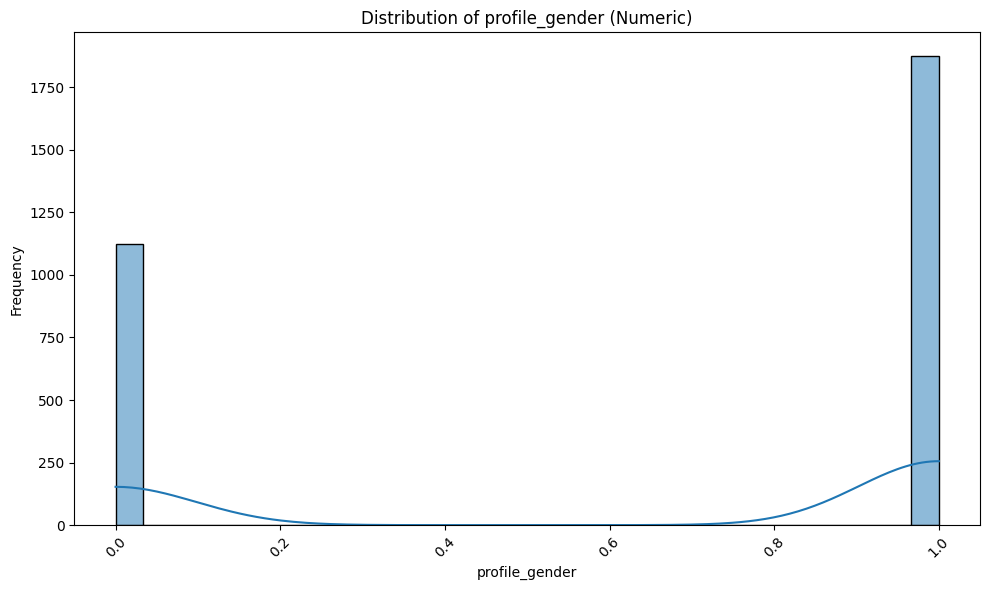

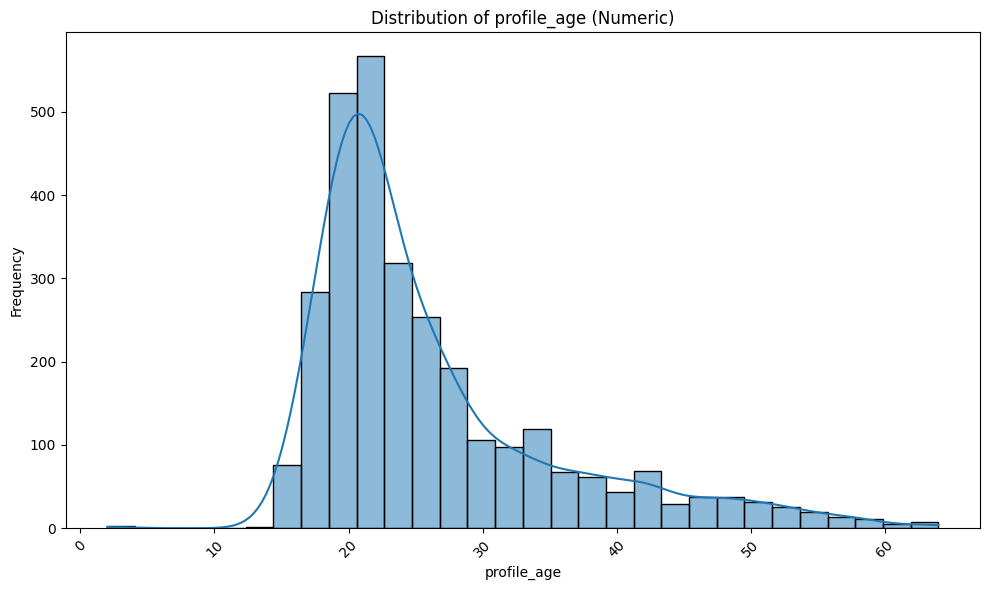

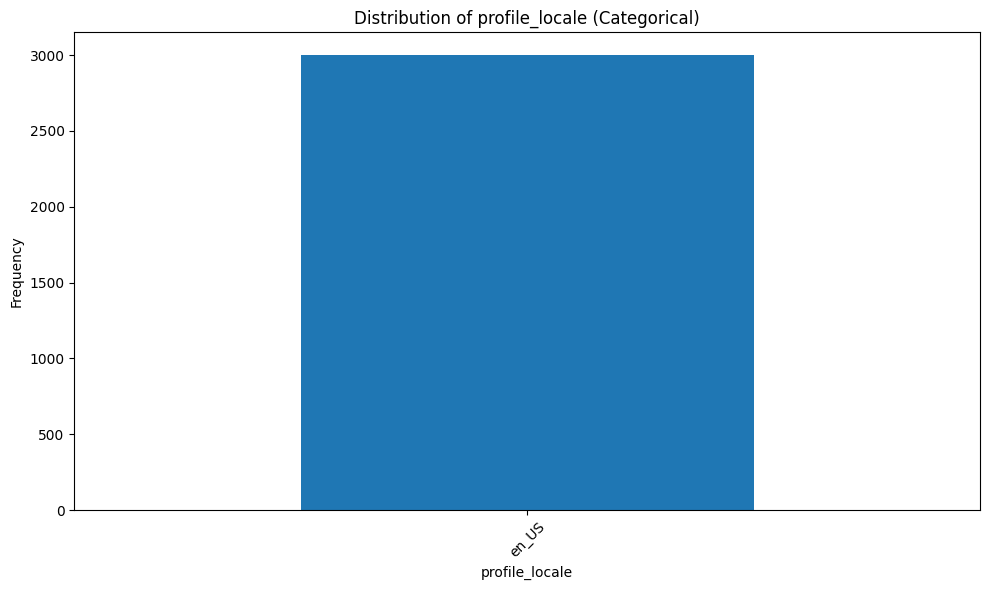

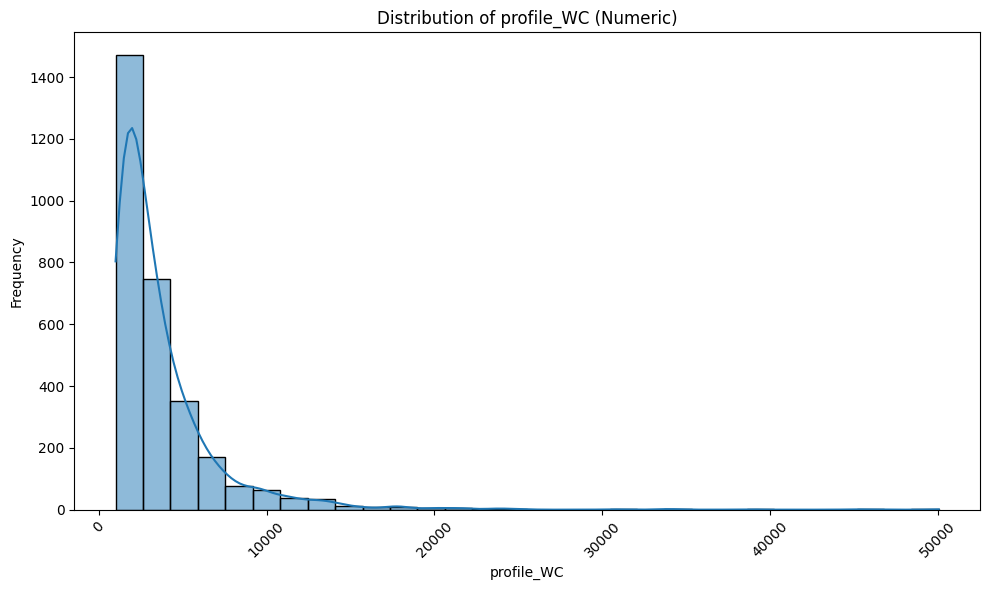

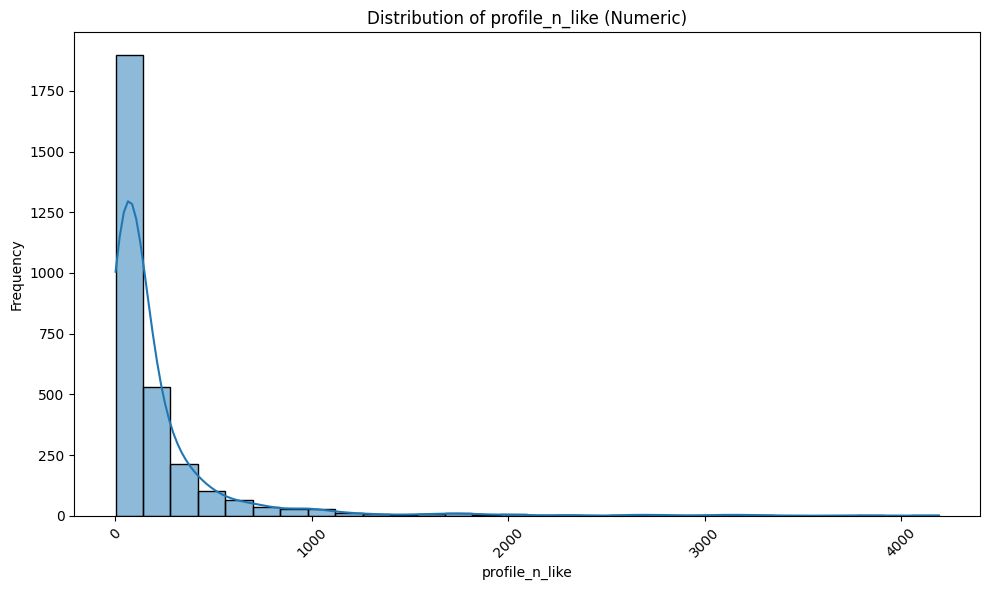

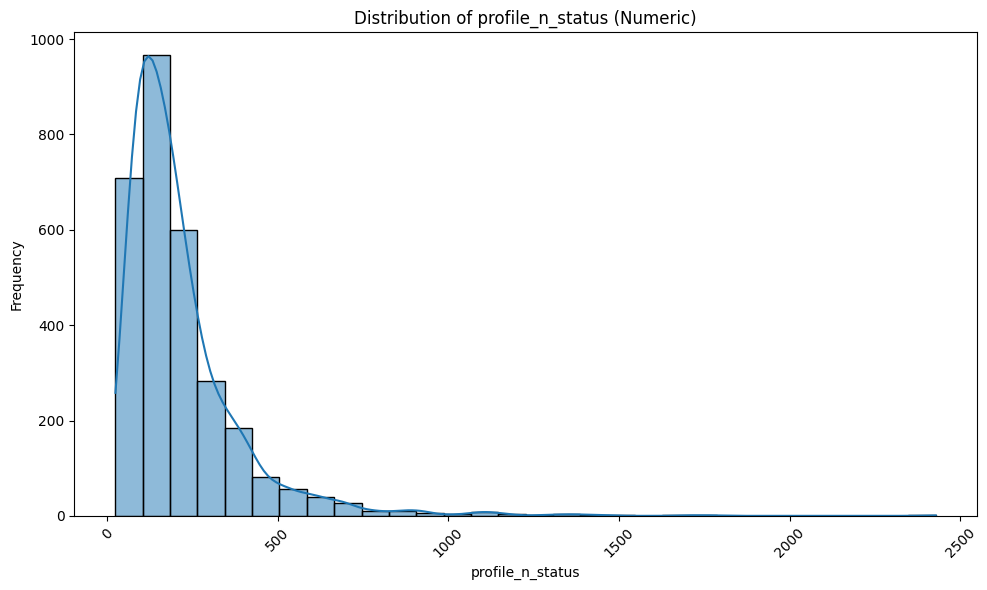

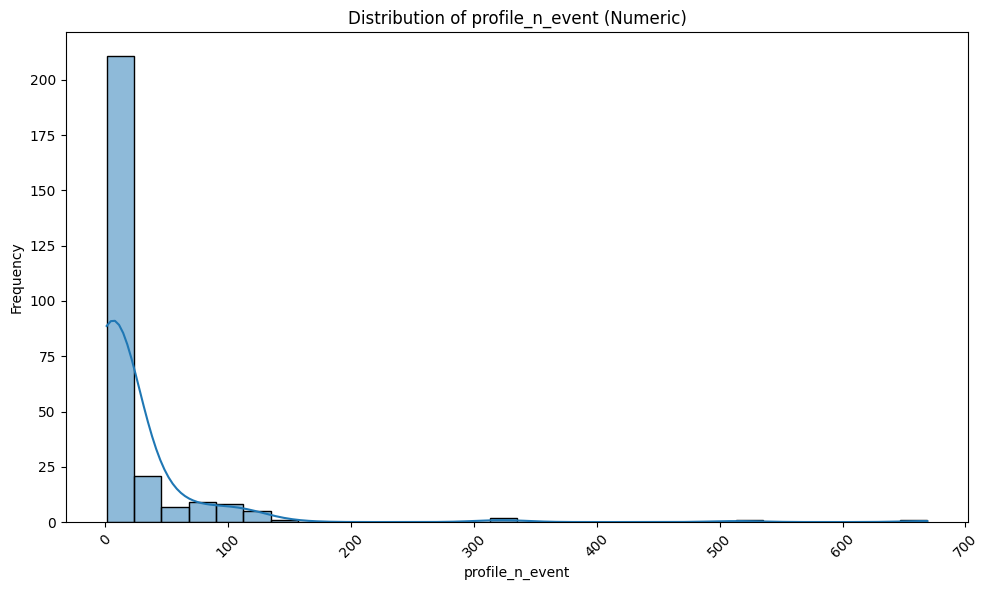

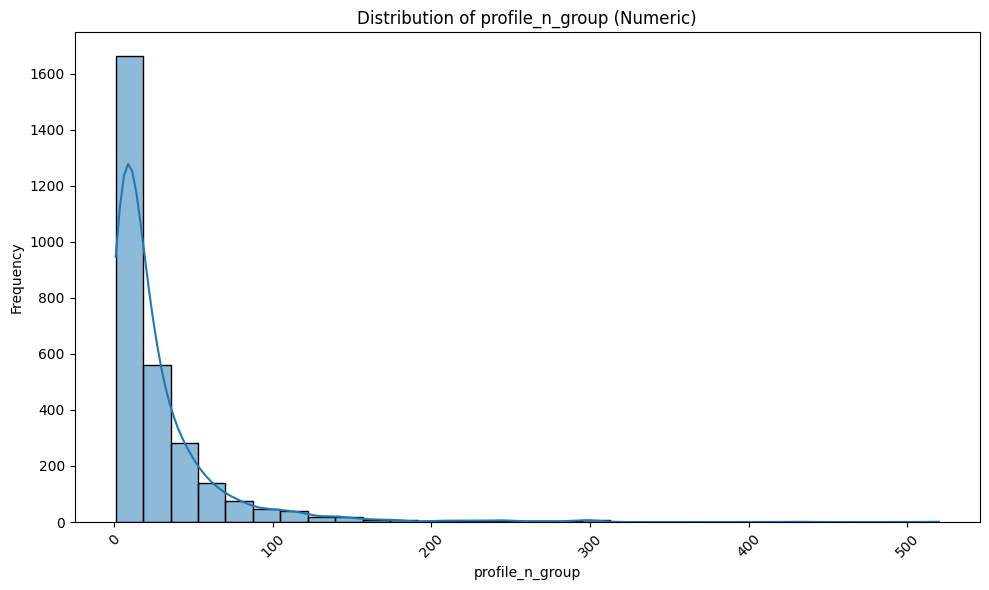

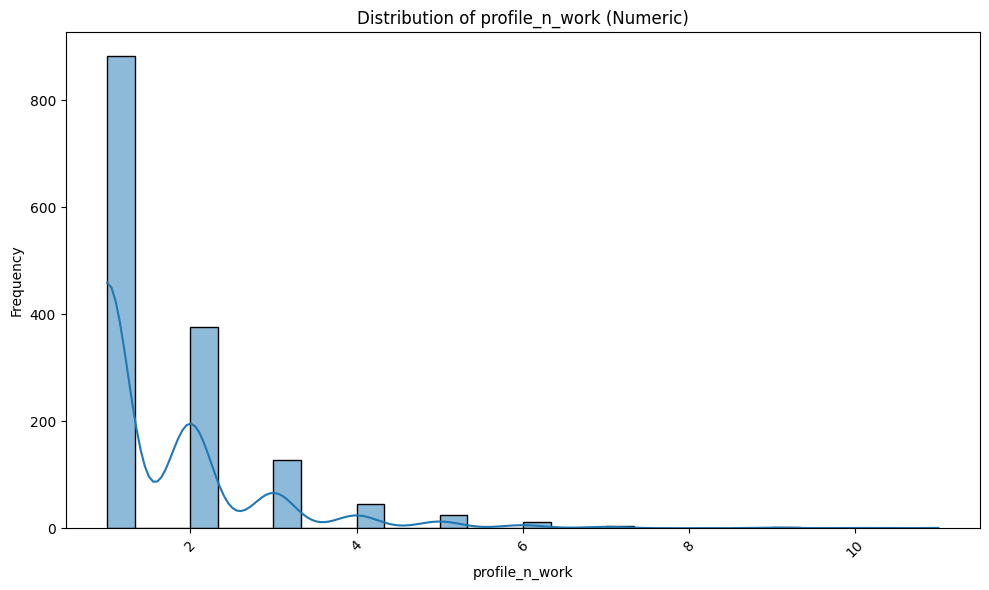

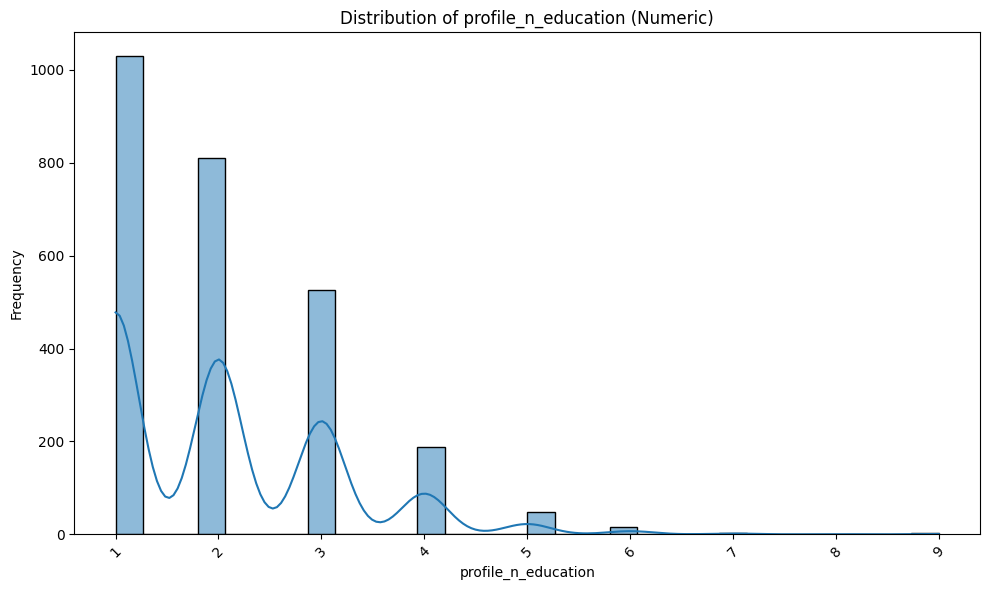

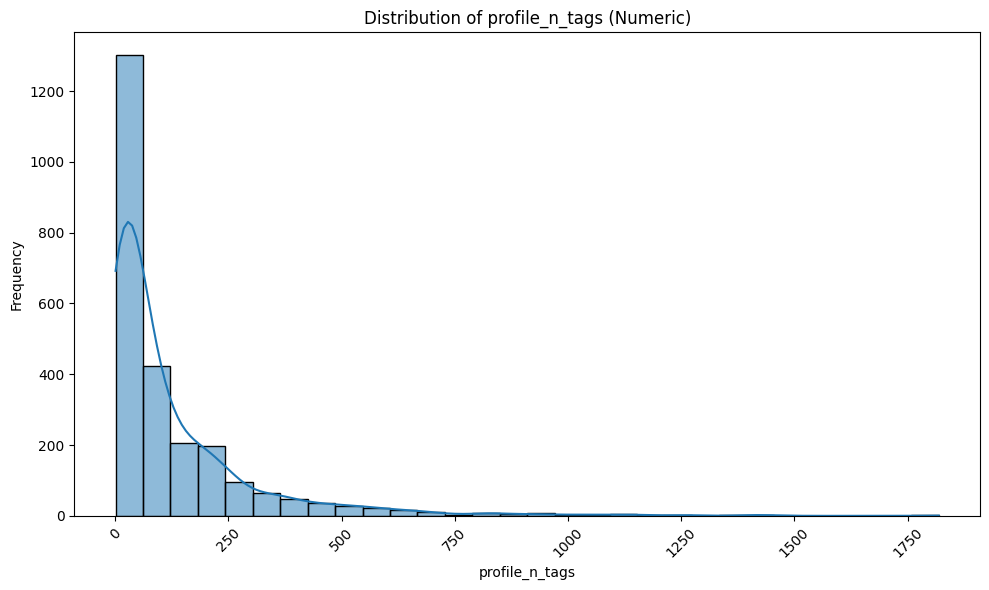

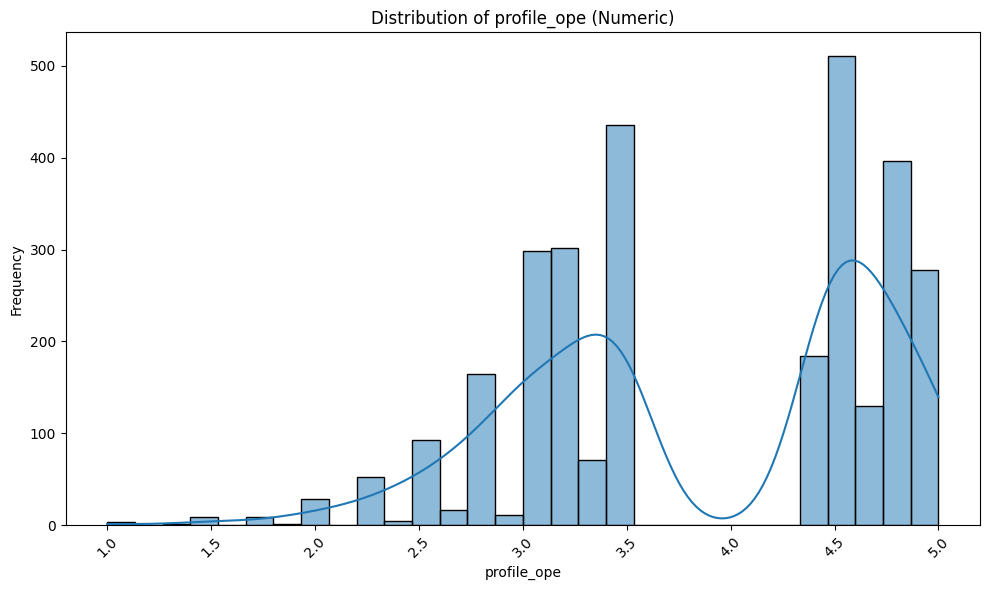

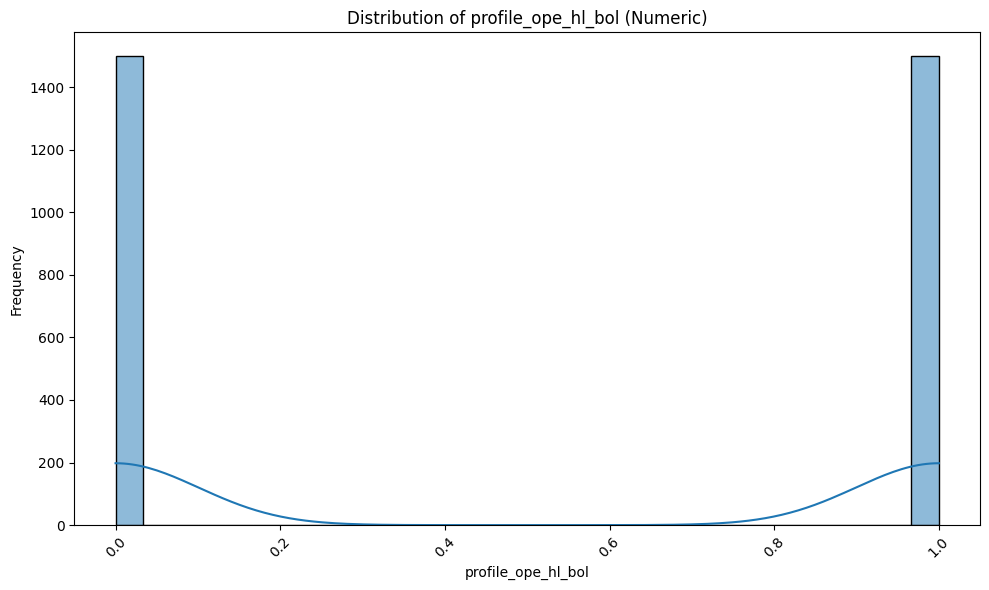

In [ ]:
for column in profile_df.columns:
    plt.figure(figsize=(10, 6))

    # Check data type of the column: numeric or categorical
    if pd.api.types.is_numeric_dtype(profile_df[column]):
        # Plot histogram for numeric columns
        sns.histplot(profile_df[column], kde=True, bins=30)
        plt.title(f'Distribution of {column} (Numeric)')
    else:
        # Plot value counts bar chart for categorical columns
        profile_df[column].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {column} (Categorical)')

    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate labels to avoid overlap
    plt.tight_layout()  # Adjust layout to make room
    plt.show()

It looks like a lot of chi-squared, poisson, exponential, and potentially some binomial distributions. Also, there are of course the categorical or binary variables that have odd distributions as expected.

Interestingly, we have more females (value of 1) in the gender feature than males (value of 0).

Also, every user is in the U.S., so that is a useless feature.

Lastly, it's odd that there's a random dip in occurrences of 'ope' scores at around 4. I don't expect that this is because of the bins/number of samples, because there are 3000 samples with only 3 bins, and 'ope' is a continuous number.

In [ ]:
# For categorical data, examine the distribution
for col in profile_df.select_dtypes(include=['object', 'category']).columns:
    print(f"\nValue counts of {col}:")
    print(profile_df[col].value_counts())


Value counts of profile_locale:
profile_locale
en_US    3000
Name: count, dtype: int64


In [ ]:
# Checking for missing values
missing_percent = profile_df.isnull().sum() / len(profile_df) * 100
print("\nPercentage of missing values:")
print(missing_percent)


Percentage of missing values:
profile_gender          0.000000
profile_age             0.000000
profile_locale          0.000000
profile_WC              0.000000
profile_n_like          0.466667
profile_n_status        0.000000
profile_n_event        91.133333
profile_n_group         3.700000
profile_n_work         50.800000
profile_n_education    12.533333
profile_n_tags         17.033333
profile_ope             0.000000
profile_ope_hl_bol      0.000000
dtype: float64


There are lots of missing values here...

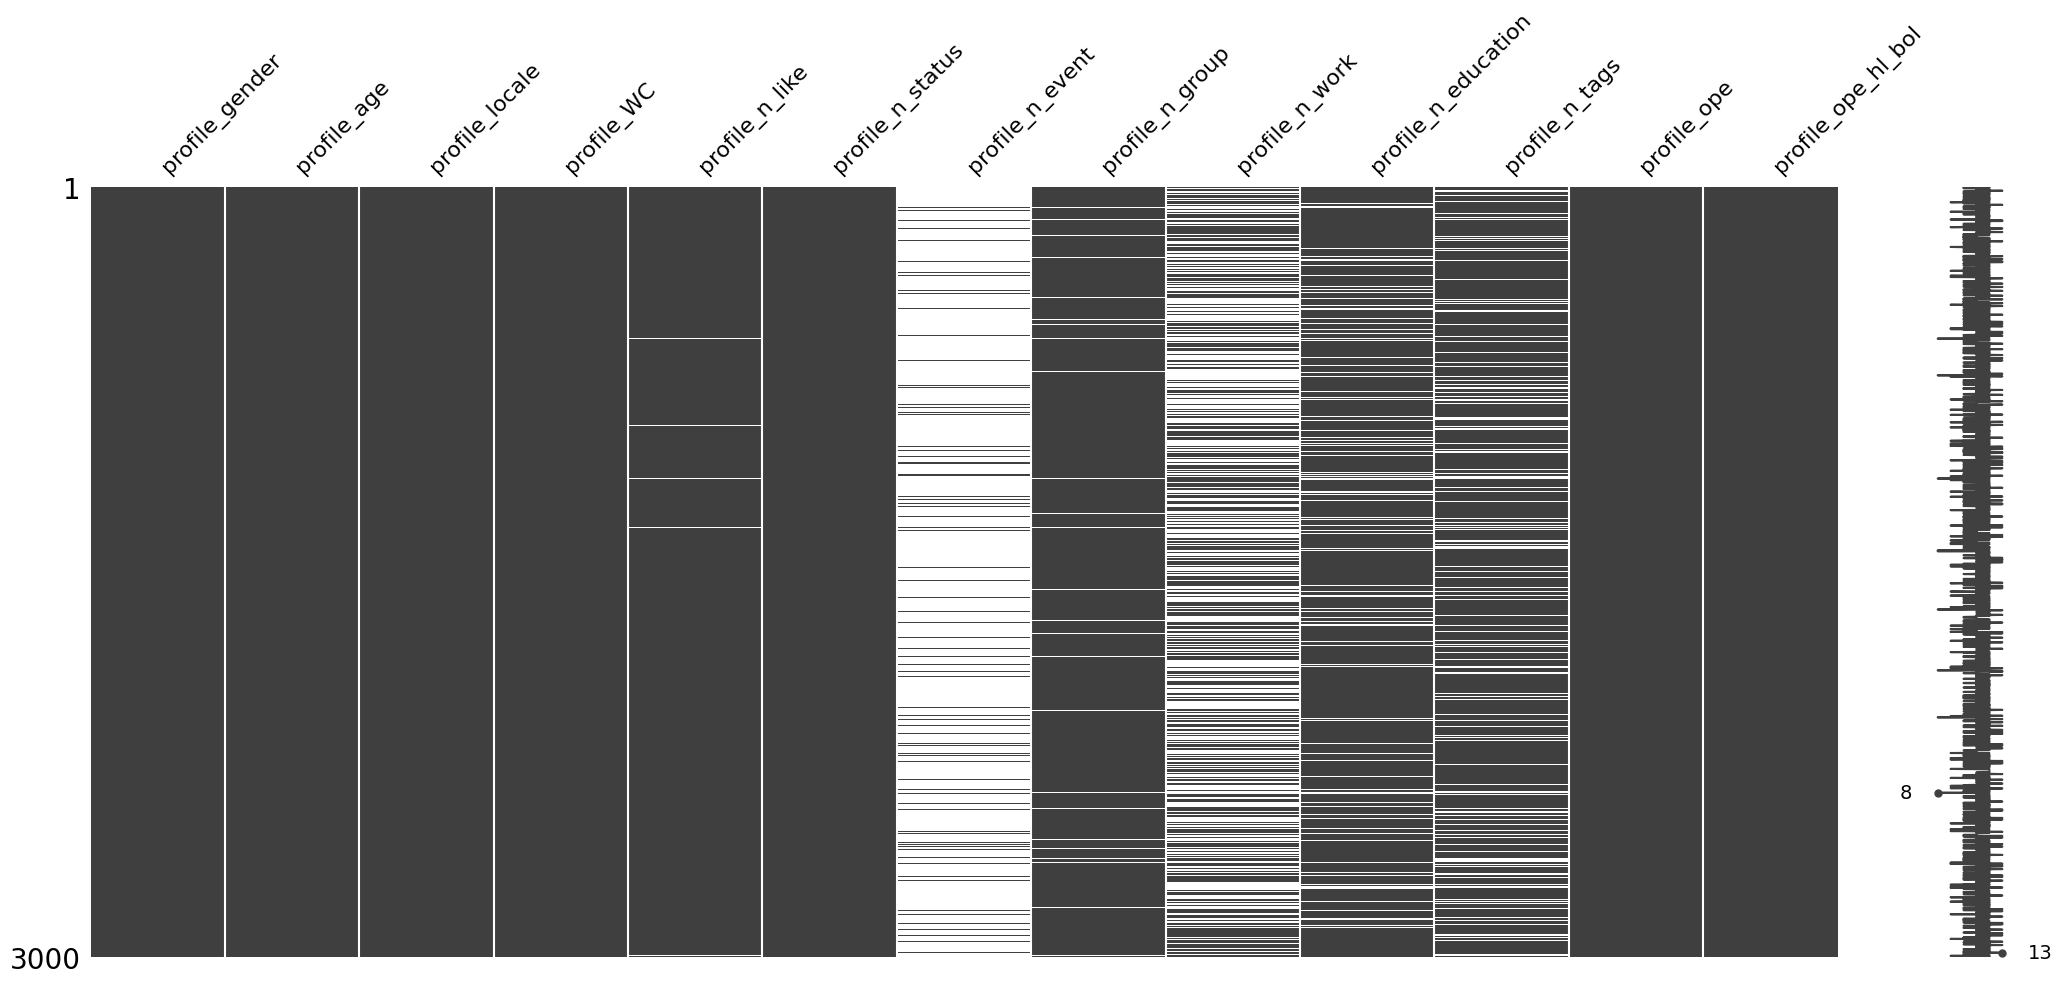

In [ ]:
# Visualization of missing data
import missingno as msno

%matplotlib inline
msno.matrix(profile_df)
plt.show()

Since profile_n_event and profile_n_work have lots of missing values, we may want to drop those. For other missing values, we could impute...

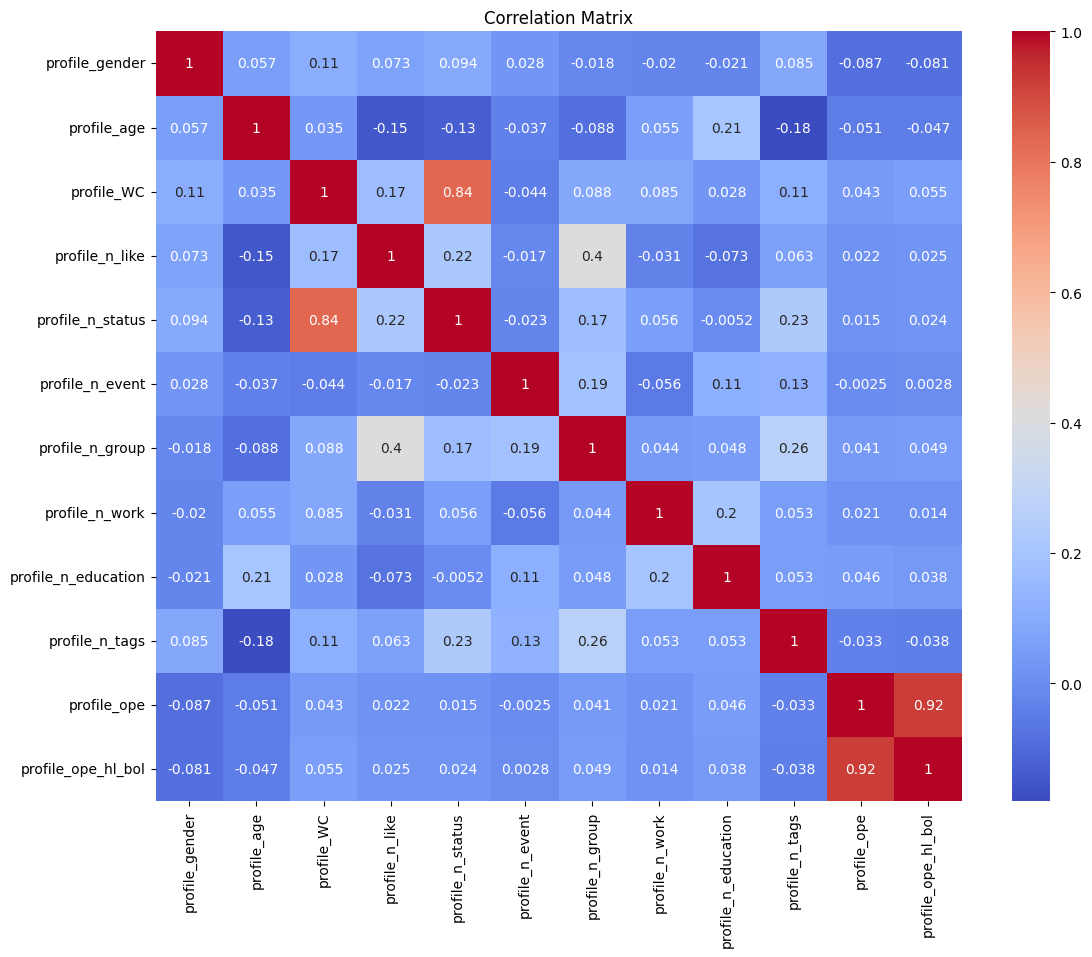

In [ ]:
# Correlation matrix
plt.figure(figsize=(13, 10))  # Set figsize
corr_matrix = profile_df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Gender has the highest correlational value (abs value) with openness... which agress with the limited psychology I know!

The number of status updates (profile_n_status) and word count (profile_WC) are highly correlated, because users must write words to make a post.

### LIWC Features 2

Note: There are no categorical features here

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Check data types
print(liwc_df.dtypes)

liwc_Analytic     float64
liwc_Clout        float64
liwc_Authentic    float64
liwc_Tone         float64
liwc_WPS          float64
                   ...   
liwc_Dash         float64
liwc_Quote        float64
liwc_Apostro      float64
liwc_Parenth      float64
liwc_OtherP       float64
Length: 92, dtype: object


In [ ]:
# Summary statistics for numeric columns
print(liwc_df.describe())

       liwc_Analytic   liwc_Clout  liwc_Authentic    liwc_Tone     liwc_WPS  \
count    3000.000000  3000.000000     3000.000000  3000.000000  3000.000000   
mean       55.060547    54.438440       58.086037    70.227607    15.253823   
std        15.465600    15.195306       21.013958    24.797471    20.116718   
min         7.770000    10.150000        1.000000     1.000000     4.480000   
25%        44.002500    43.755000       45.940000    52.820000     9.510000   
50%        55.220000    54.265000       61.500000    76.120000    11.680000   
75%        66.217500    64.722500       73.852500    91.792500    15.700000   
max        92.840000    96.930000       99.000000    99.000000   642.710000   

       liwc_Sixltr     liwc_Dic  liwc_function.  liwc_pronoun   liwc_ppron  \
count  3000.000000  3000.000000      3000.00000   3000.000000  3000.000000   
mean     13.206670    82.038847        46.21365     14.473163     9.952337   
std       2.609931    10.418585         7.40264      3

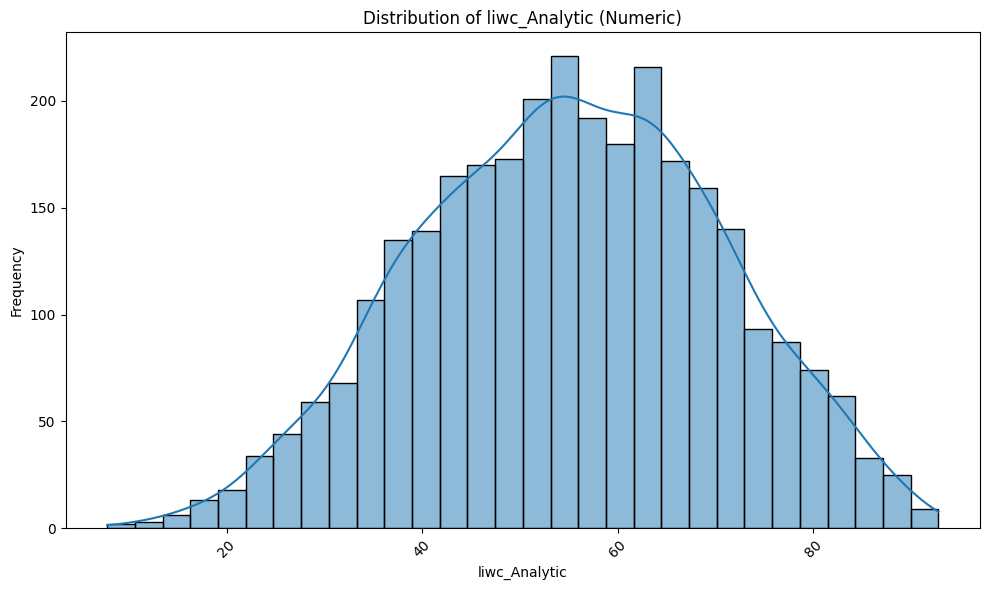

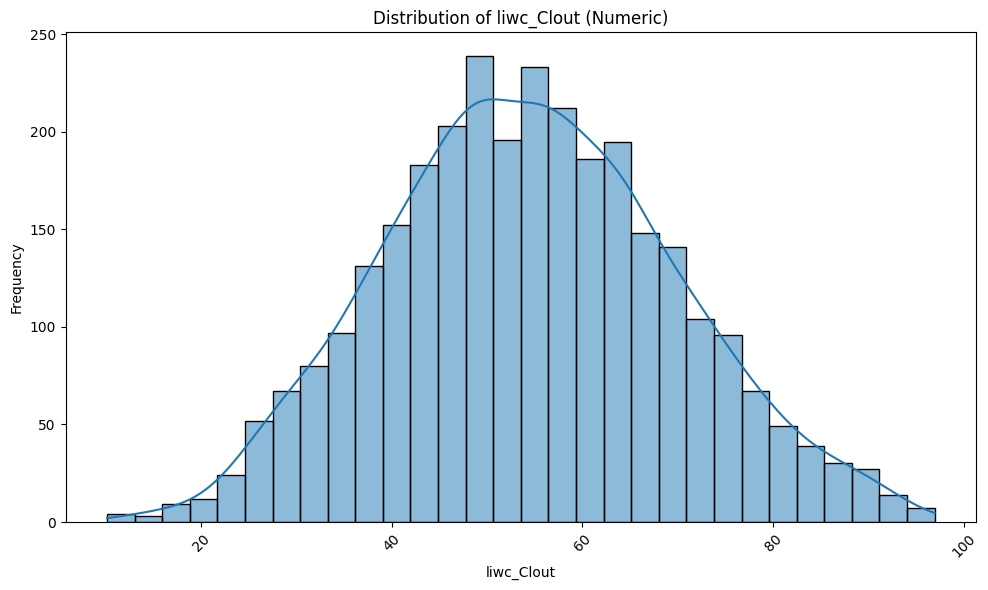

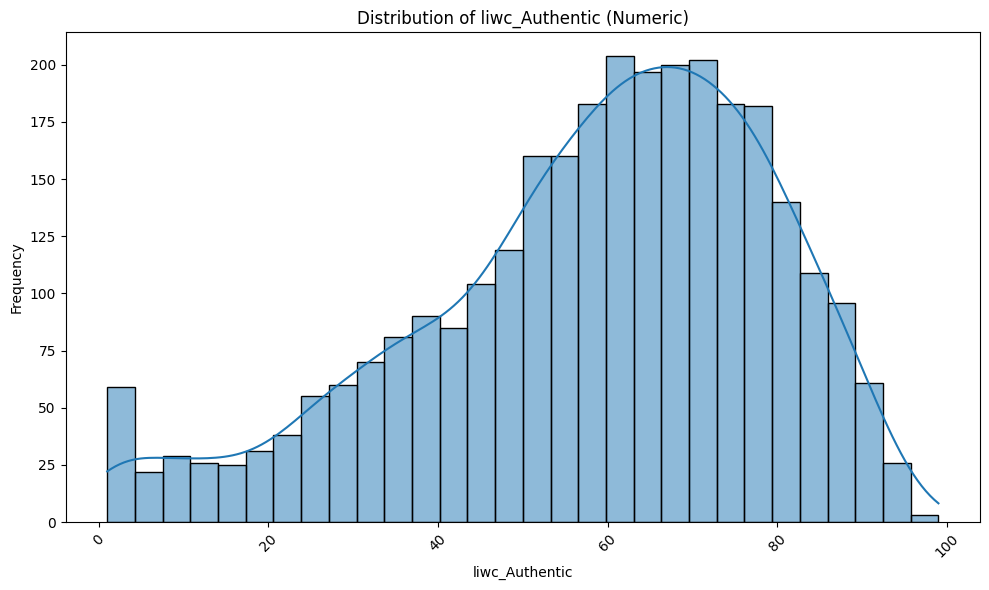

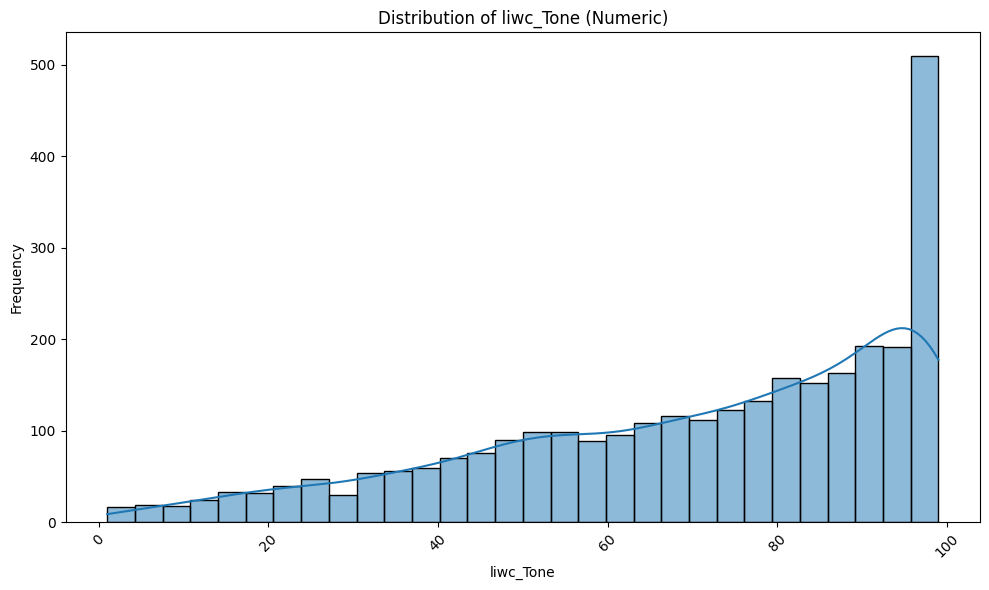

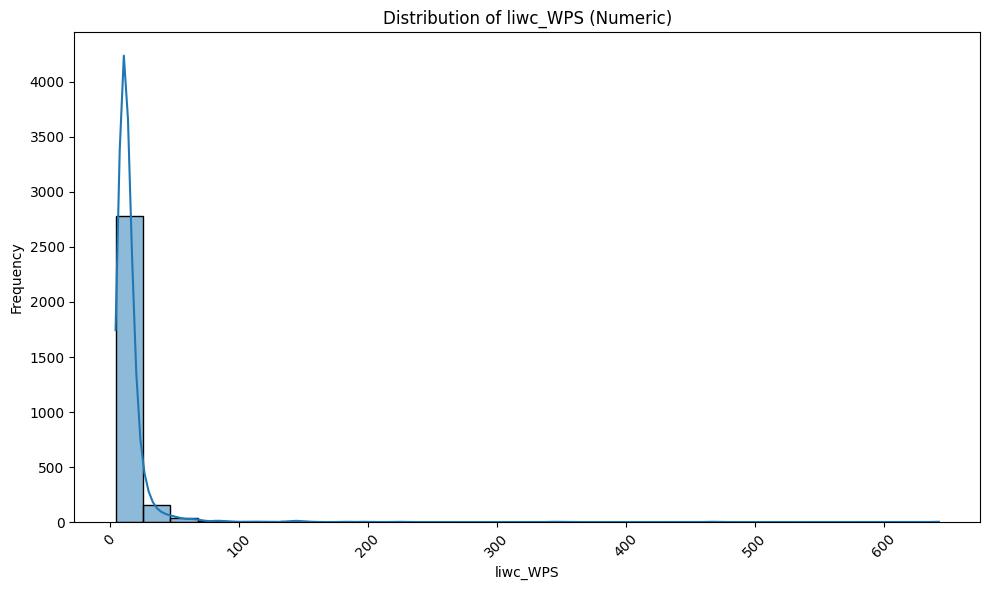

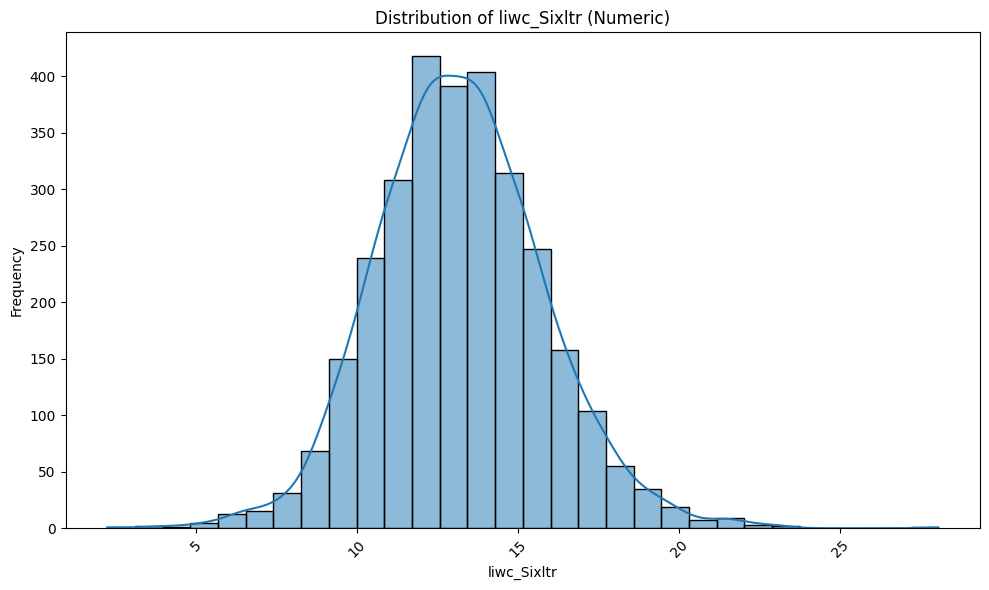

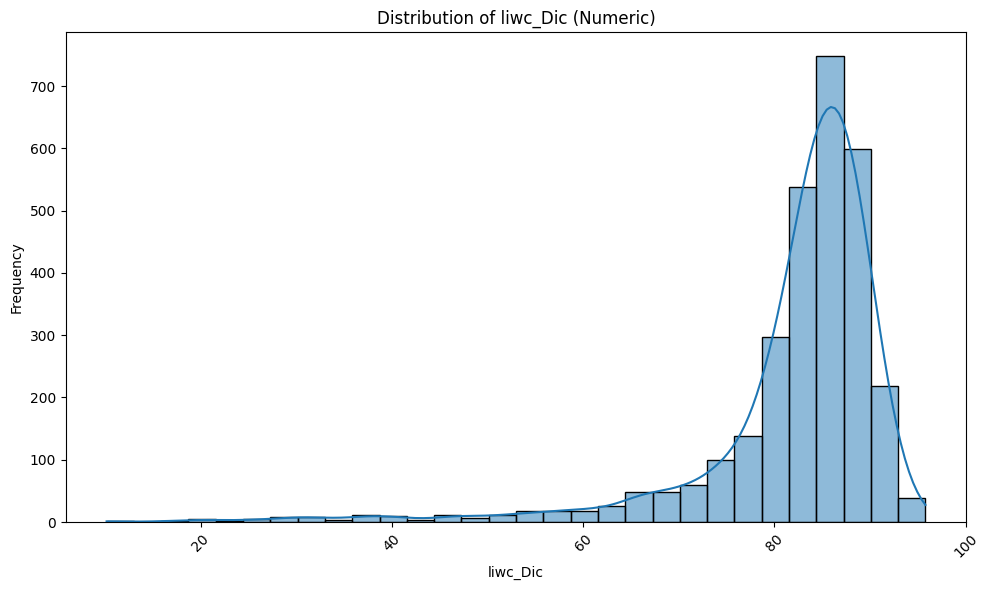

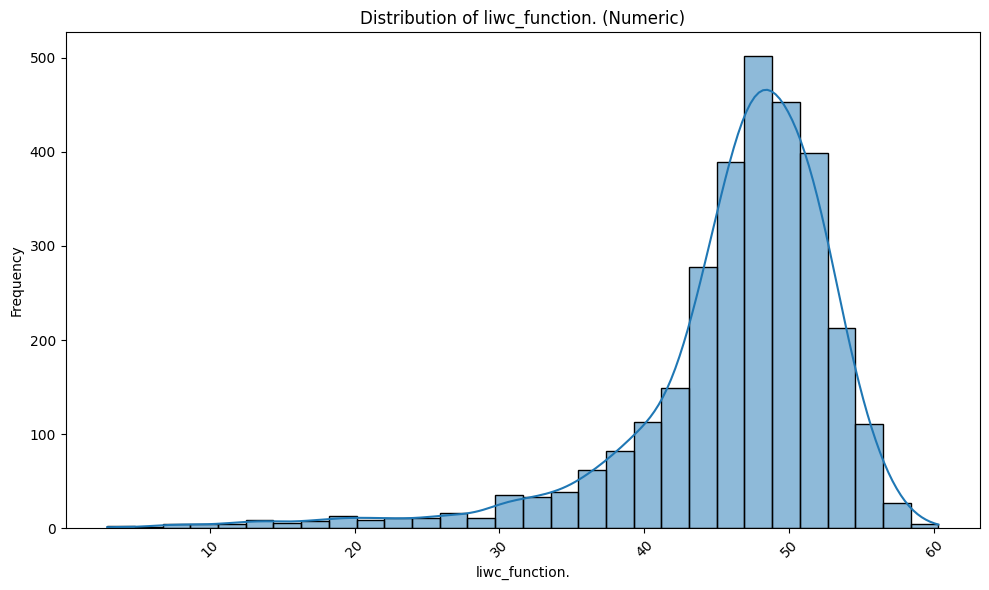

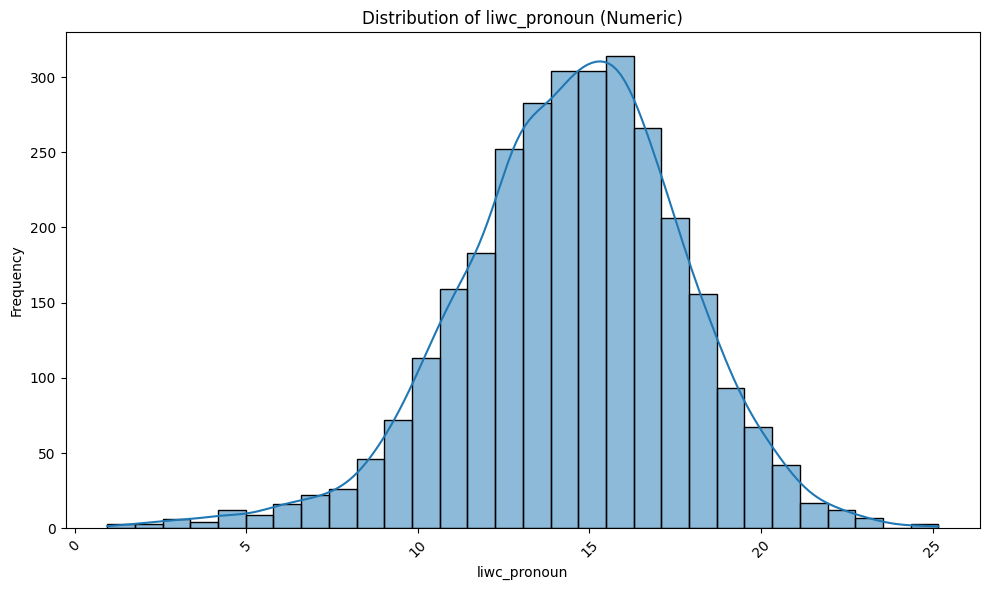

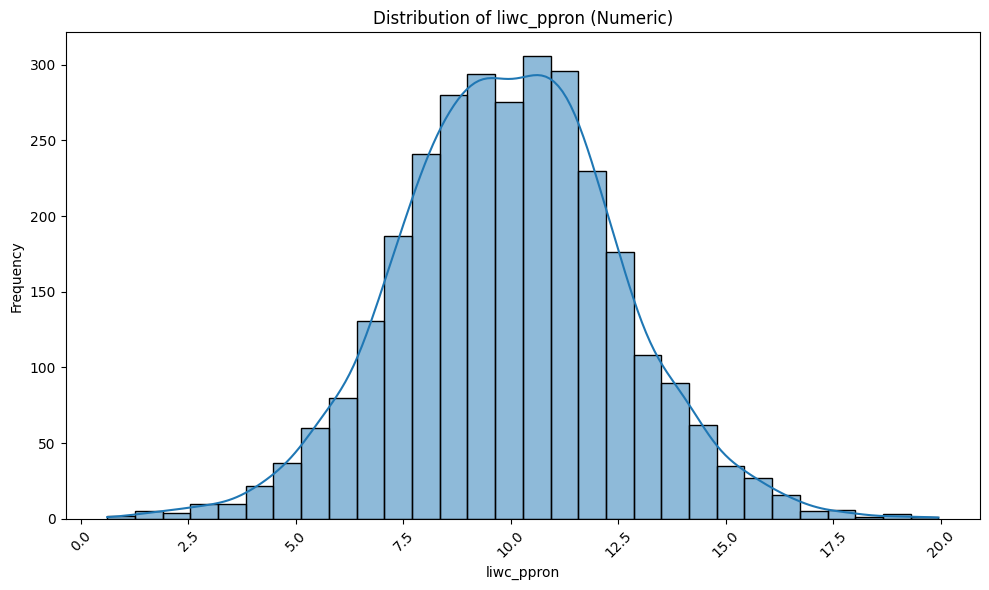

In [ ]:
for column in liwc_df.columns[:10]:  # Just examine 10 features
    plt.figure(figsize=(10, 6))

    # Check data type of the column: numeric or categorical
    if pd.api.types.is_numeric_dtype(liwc_df[column]):
        # Plot histogram for numeric columns
        sns.histplot(liwc_df[column], kde=True, bins=30)
        plt.title(f'Distribution of {column} (Numeric)')
    else:
        # Plot value counts bar chart for categorical columns
        liwc_df[column].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {column} (Categorical)')

    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate labels to avoid overlap
    plt.tight_layout()  # Adjust layout to make room
    plt.show()

Values are in specified regions sometimes, but other than that, not much surprising here...

In [ ]:
# Checking for missing values
missing_percent = liwc_df.isnull().sum() / len(liwc_df) * 100

# Filter and print only columns with missing values
missing_percent = missing_percent[missing_percent > 0]

if not missing_percent.empty:
    print("\nPercentage of missing values in columns with missing data:")
    print(missing_percent)
else:
    print("No missing values found.")

No missing values found.


There are no missing values here, as we'd expect...

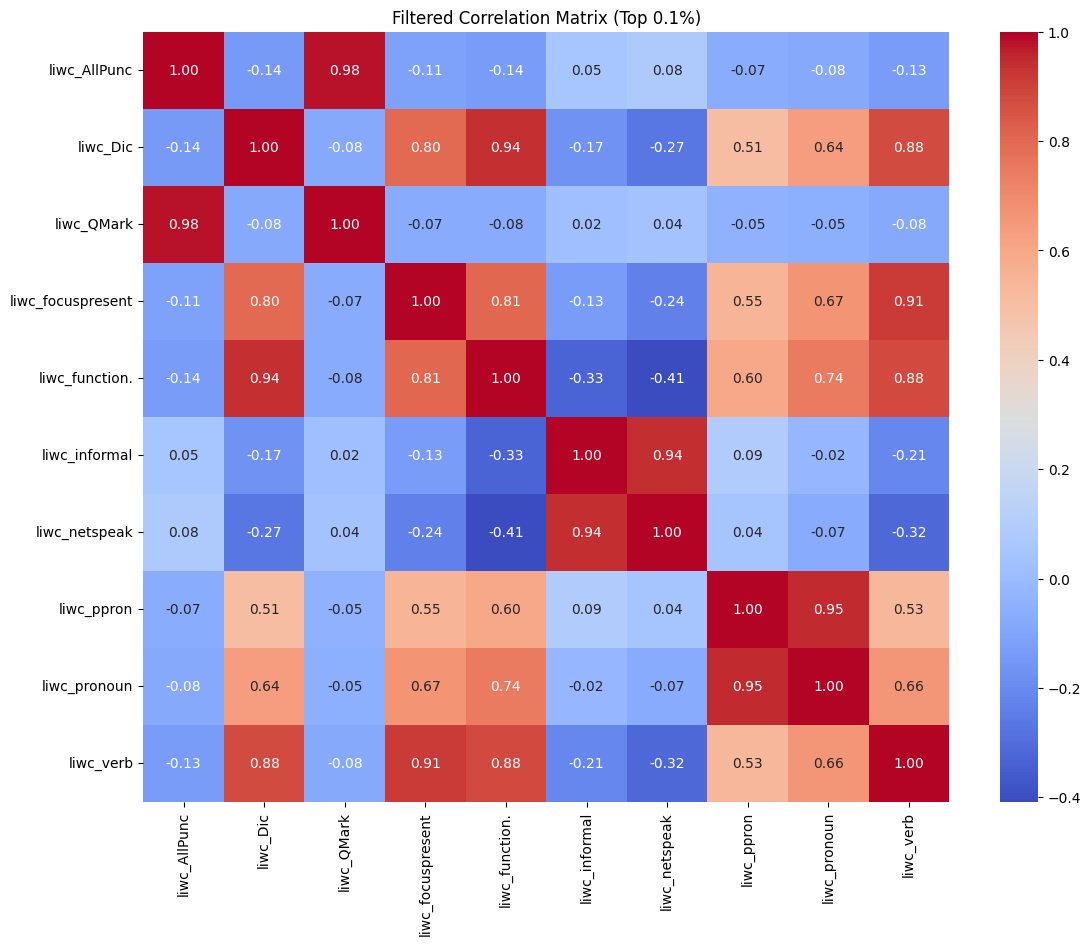

In [ ]:
# Compute the correlation matrix for numeric columns
corr_matrix = liwc_df.select_dtypes(include=['float64', 'int64']).corr()

# Mask to ignore the upper triangle and diagonal in the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Flatten the correlation matrix and filter out 'NaN' and mask values
corr_flat = corr_matrix.where(mask).stack().dropna()

# Determine the 99.9th percentile of absolute correlations to find the top 0.1% (the correlation matrix would be too big otherwise)
threshold = np.percentile(np.abs(corr_flat), 99.9)

# Filter the correlation pairs to keep only those above the threshold
high_corr_flat = corr_flat[abs(corr_flat) > threshold]

# Get the unique features involved in the high correlations
high_corr_features = np.unique([pair for pairs in high_corr_flat.index for pair in pairs])

# Create a new correlation matrix including only the high correlation features
high_corr_matrix = liwc_df[high_corr_features].corr()

# Plot the heatmap for the filtered correlation matrix
plt.figure(figsize=(13, 10))
sns.heatmap(high_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Filtered Correlation Matrix (Top 0.1%)')
plt.show()

A linguistics expert who is familiar with LIWC may be able to make an interpretation of what these correlation values mean

### Analysis

Interesting observations are added throughout the analysis, such as distributions, correlational values, and dataset balance. However, pertaining to the exact question posed, I see one specific problem in the dataset, which is **missing values**.

In order to mitigate this problem, I will drop the profile_n_event and profile_n_work columns since they have so many missing values, and impute with K-Nearest-Neighbors for the other columns.

## Imputation

### Fill Missing Values

In [ ]:
# Drop columns not for imputation (all users are in the US)
profile_df = profile_df.drop(['profile_locale', 'profile_ope', 'profile_ope_hl_bol'], axis=1)
profile_df.head()

,profile_gender,profile_age,profile_WC,profile_n_like,profile_n_status,profile_n_event,profile_n_group,profile_n_work,profile_n_education,profile_n_tags
0,0,18,1531,61.0,103.0,NaN,42.0,NaN,NaN,71.0
1,1,25,7431,88.0,295.0,NaN,181.0,3.0,3.0,541.0
2,0,51,3768,22.0,86.0,NaN,10.0,2.0,4.0,NaN
3,1,19,3543,332.0,197.0,7.0,4.0,NaN,1.0,269.0
4,1,28,11155,178.0,583.0,NaN,NaN,1.0,NaN,77.0


In [ ]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
profile_df = pd.DataFrame(knn_imputer.fit_transform(profile_df), columns=profile_df.columns)

In [ ]:
profile_df.head()

,profile_gender,profile_age,profile_WC,profile_n_like,profile_n_status,profile_n_event,profile_n_group,profile_n_work,profile_n_education,profile_n_tags
0,0.0,18.0,1531.0,61.0,103.0,24.8,42.0,1.6,1.2,71.0
1,1.0,25.0,7431.0,88.0,295.0,13.8,181.0,3.0,3.0,541.0
2,0.0,51.0,3768.0,22.0,86.0,26.8,10.0,2.0,4.0,188.4
3,1.0,19.0,3543.0,332.0,197.0,7.0,4.0,1.2,1.0,269.0
4,1.0,28.0,11155.0,178.0,583.0,3.4,28.4,1.0,2.4,77.0


### Assign Imputed Values to total DataFrame

In [ ]:
# Choose all columns
columns_to_update = profile_df.columns.tolist()

# Update
for column in columns_to_update:
    user_info[column] = profile_df[column]

In [ ]:
# Check that new columns have no missing values

# Filter for 'profile_' columns
profile_columns = [col for col in user_info.columns if col.startswith('profile_')]

# Check for missing
missing_values_check = user_info[profile_columns].isnull().sum()

# Print column if missing, if any
print("Missing values in profile columns:")
print(missing_values_check[missing_values_check > 0])

Missing values in profile columns:
Series([], dtype: int64)


## Save

In [ ]:
# Drop 'profile_locale' column because they're all the same
user_info.drop('profile_locale', axis=1, inplace=True)
user_info.head()

,userid,message,message tokens,cleaned message,cleaned message tokens,profile_gender,profile_age,profile_WC,profile_n_like,profile_n_status,...,Longform(758),Longform(759),Longform(760),Longform(761),Longform(762),Longform(763),Longform(764),Longform(765),Longform(766),Longform(767)
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,"['is', 'still', 'pissed', 'that', 'Eminem', 'w...",still piss eminem wasnt official airplanes rec...,"['still', 'piss', 'eminem', 'wasnt', 'official...",0.0,18.0,1531.0,61.0,103.0,...,0.037956,-0.034081,-0.126294,-0.049998,-0.159850,-0.080478,0.442372,-0.393749,-0.026991,-0.042139
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,"['is', 'singing', 'today', 'and', 'is', 'a', '...",sing today little nurvous please pray send tho...,"['sing', 'today', 'little', 'nurvous', 'please...",1.0,25.0,7431.0,88.0,295.0,...,-0.040673,0.024327,-0.073384,0.098353,-0.182571,0.029648,0.587017,-0.434201,0.010119,0.057981
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,"['I', 'had', 'a', 'wonderful', 'day', 'at', 'A...",wonderful day anderson beat good beat importan...,"['wonderful', 'day', 'anderson', 'beat', 'good...",0.0,51.0,3768.0,22.0,86.0,...,-0.048986,0.025647,-0.067190,0.115309,-0.200020,0.054418,0.478724,-0.286935,-0.001591,0.114993
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...,"['i', 'like', 'it', 'on', 'the', 'floor', '!',...",like floor hope miss little bit maybe reason c...,"['like', 'floor', 'hope', 'miss', 'little', 'b...",1.0,19.0,3543.0,332.0,197.0,...,0.080972,0.014423,-0.133403,0.067971,-0.185953,-0.012492,0.523918,-0.370653,0.091308,-0.023970
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...,"['is', 'about', 'to', 'make', 'some', 'moolah'...",make moolah need start play mafia wars love da...,"['make', 'moolah', 'need', 'start', 'play', 'm...",1.0,28.0,11155.0,178.0,583.0,...,-0.024671,0.046818,-0.064787,0.076012,-0.251376,-0.018756,0.502822,-0.370936,-0.033058,0.084840


In [ ]:
%ls

Final/  Lab2/  Lab3.2/        Lab3_extra/  Lab4_extra/  Lab5_extra/
Lab1/   Lab3/  Lab3.2_extra/  Lab4/        Lab5/


In [ ]:
user_info.to_csv('Final/user_info_plus_imputed.csv', index=False)

# Part 4: Sentiment Analysis

## Load

In [ ]:
user_info = pd.read_csv('Final/user_info_plus_imputed.csv')
user_info.head()

,userid,message,message tokens,cleaned message,cleaned message tokens,profile_gender,profile_age,profile_WC,profile_n_like,profile_n_status,...,Longform(758),Longform(759),Longform(760),Longform(761),Longform(762),Longform(763),Longform(764),Longform(765),Longform(766),Longform(767)
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,"['is', 'still', 'pissed', 'that', 'Eminem', 'w...",still piss eminem wasnt official airplanes rec...,"['still', 'piss', 'eminem', 'wasnt', 'official...",0.0,18.0,1531.0,61.0,103.0,...,0.037956,-0.034081,-0.126294,-0.049998,-0.159850,-0.080478,0.442372,-0.393749,-0.026991,-0.042139
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,"['is', 'singing', 'today', 'and', 'is', 'a', '...",sing today little nurvous please pray send tho...,"['sing', 'today', 'little', 'nurvous', 'please...",1.0,25.0,7431.0,88.0,295.0,...,-0.040673,0.024327,-0.073384,0.098353,-0.182571,0.029648,0.587017,-0.434201,0.010119,0.057981
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,"['I', 'had', 'a', 'wonderful', 'day', 'at', 'A...",wonderful day anderson beat good beat importan...,"['wonderful', 'day', 'anderson', 'beat', 'good...",0.0,51.0,3768.0,22.0,86.0,...,-0.048986,0.025647,-0.067190,0.115309,-0.200020,0.054418,0.478724,-0.286935,-0.001591,0.114993
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...,"['i', 'like', 'it', 'on', 'the', 'floor', '!',...",like floor hope miss little bit maybe reason c...,"['like', 'floor', 'hope', 'miss', 'little', 'b...",1.0,19.0,3543.0,332.0,197.0,...,0.080972,0.014423,-0.133403,0.067971,-0.185953,-0.012492,0.523918,-0.370653,0.091308,-0.023970
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...,"['is', 'about', 'to', 'make', 'some', 'moolah'...",make moolah need start play mafia wars love da...,"['make', 'moolah', 'need', 'start', 'play', 'm...",1.0,28.0,11155.0,178.0,583.0,...,-0.024671,0.046818,-0.064787,0.076012,-0.251376,-0.018756,0.502822,-0.370936,-0.033058,0.084840


## Create Sentiment Features

This should be done with the original text, because removal of stopwords and normalization (such as removing exclamations) could be very relevant to sentiment

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# VADER SentimentIntensityAnalyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

In [ ]:
def analyze_sentiment(ids, messages):
    # Prepare lists to store results including IDs
    userids = []
    polarities = []
    subjectivities = []
    nltk_compounds = []

    # Iterate over IDs and cleaned messages
    for _id, message in zip(ids, cleaned_messages):
        # Append ID to the result list
        userids.append(_id)

        # TextBlob analysis
        blob = TextBlob(message)
        polarity = blob.sentiment.polarity
        subjectivity = blob.sentiment.subjectivity

        # NLTK VADER analysis
        nltk_compound = sentiment_analyzer.polarity_scores(message)['compound']

        # Append results to lists
        polarities.append(polarity)
        subjectivities.append(subjectivity)
        nltk_compounds.append(nltk_compound)

    return userids, polarities, subjectivities, nltk_compounds

In [ ]:
# Apply sentiment analysis (need ids for snippet)
ids, polarities, subjectivities, nltk_compounds = analyze_sentiment(user_info['userid'], user_info['message'])

# Create DataFrame including IDs
sentiment_df = pd.DataFrame({
    'userid': ids,
    'Polarity': polarities,
    'Subjectivity': subjectivities,
    'NLTK_Compound': nltk_compounds
})

# Show for snippet
print(sentiment_df.shape)
sentiment_df.head()

(3000, 4)


,userid,Polarity,Subjectivity,NLTK_Compound
0,0003e82099f3087d16b301104330547c,0.019048,0.514286,-0.9848
1,001494c3b74f124a2e3435fff17f376b,0.327134,0.658176,1.0000
2,00257e647892d77d5f9b4c33a664e6f7,0.375970,0.597166,0.9997
3,002bc06dc29c9ebd31ea3d40d4e13861,0.110793,0.615387,0.9961
4,004ed92354145c51355bd757a0733b1a,0.177180,0.544536,0.9995


In [ ]:
# Combine DataFrames (could also just concat because we shouldn't have changed order)
user_info = pd.merge(user_info, sentiment_df, on='userid', how='inner')

#  Check Results
print(user_info.shape)
user_info.head()

(3000, 978)


,userid,message,message tokens,cleaned message,cleaned message tokens,profile_gender,profile_age,profile_WC,profile_n_like,profile_n_status,...,Longform(761),Longform(762),Longform(763),Longform(764),Longform(765),Longform(766),Longform(767),Polarity,Subjectivity,NLTK_Compound
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,"['is', 'still', 'pissed', 'that', 'Eminem', 'w...",still piss eminem wasnt official airplanes rec...,"['still', 'piss', 'eminem', 'wasnt', 'official...",0.0,18.0,1531.0,61.0,103.0,...,-0.049998,-0.159850,-0.080478,0.442372,-0.393749,-0.026991,-0.042139,0.019048,0.514286,-0.9848
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,"['is', 'singing', 'today', 'and', 'is', 'a', '...",sing today little nurvous please pray send tho...,"['sing', 'today', 'little', 'nurvous', 'please...",1.0,25.0,7431.0,88.0,295.0,...,0.098353,-0.182571,0.029648,0.587017,-0.434201,0.010119,0.057981,0.327134,0.658176,1.0000
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,"['I', 'had', 'a', 'wonderful', 'day', 'at', 'A...",wonderful day anderson beat good beat importan...,"['wonderful', 'day', 'anderson', 'beat', 'good...",0.0,51.0,3768.0,22.0,86.0,...,0.115309,-0.200020,0.054418,0.478724,-0.286935,-0.001591,0.114993,0.375970,0.597166,0.9997
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...,"['i', 'like', 'it', 'on', 'the', 'floor', '!',...",like floor hope miss little bit maybe reason c...,"['like', 'floor', 'hope', 'miss', 'little', 'b...",1.0,19.0,3543.0,332.0,197.0,...,0.067971,-0.185953,-0.012492,0.523918,-0.370653,0.091308,-0.023970,0.110793,0.615387,0.9961
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...,"['is', 'about', 'to', 'make', 'some', 'moolah'...",make moolah need start play mafia wars love da...,"['make', 'moolah', 'need', 'start', 'play', 'm...",1.0,28.0,11155.0,178.0,583.0,...,0.076012,-0.251376,-0.018756,0.502822,-0.370936,-0.033058,0.084840,0.177180,0.544536,0.9995


## Save

In [ ]:
%ls

Final/  Lab2/  Lab3.2/        Lab3_extra/  Lab4_extra/  Lab5_extra/
Lab1/   Lab3/  Lab3.2_extra/  Lab4/        Lab5/


In [ ]:
user_info.to_csv('Final/user_info_final.csv', index=False)

# Part 5: Supervised Learning

For each model, use a GradientBoostingClassifier from sklearn with hyperparameter tuning

## Setup

### Load

In [ ]:
user_info = pd.read_csv('Final/user_info_final.csv')
user_target = pd.read_csv('Final/user_target.csv')

In [ ]:
user_info.head()

,userid,message,message tokens,cleaned message,cleaned message tokens,profile_gender,profile_age,profile_WC,profile_n_like,profile_n_status,...,Longform(761),Longform(762),Longform(763),Longform(764),Longform(765),Longform(766),Longform(767),Polarity,Subjectivity,NLTK_Compound
0,0003e82099f3087d16b301104330547c,is still pissed that Eminem wasnt in the offic...,"['is', 'still', 'pissed', 'that', 'Eminem', 'w...",still piss eminem wasnt official airplanes rec...,"['still', 'piss', 'eminem', 'wasnt', 'official...",0.0,18.0,1531.0,61.0,103.0,...,-0.049998,-0.159850,-0.080478,0.442372,-0.393749,-0.026991,-0.042139,0.019048,0.514286,-0.9848
1,001494c3b74f124a2e3435fff17f376b,is singing today and is a little nurvous . ple...,"['is', 'singing', 'today', 'and', 'is', 'a', '...",sing today little nurvous please pray send tho...,"['sing', 'today', 'little', 'nurvous', 'please...",1.0,25.0,7431.0,88.0,295.0,...,0.098353,-0.182571,0.029648,0.587017,-0.434201,0.010119,0.057981,0.327134,0.658176,1.0000
2,00257e647892d77d5f9b4c33a664e6f7,I had a wonderful day at Anderson I am beat ...,"['I', 'had', 'a', 'wonderful', 'day', 'at', 'A...",wonderful day anderson beat good beat importan...,"['wonderful', 'day', 'anderson', 'beat', 'good...",0.0,51.0,3768.0,22.0,86.0,...,0.115309,-0.200020,0.054418,0.478724,-0.286935,-0.001591,0.114993,0.375970,0.597166,0.9997
3,002bc06dc29c9ebd31ea3d40d4e13861,i like it on the floor! :)\ti hope you miss me...,"['i', 'like', 'it', 'on', 'the', 'floor', '!',...",like floor hope miss little bit maybe reason c...,"['like', 'floor', 'hope', 'miss', 'little', 'b...",1.0,19.0,3543.0,332.0,197.0,...,0.067971,-0.185953,-0.012492,0.523918,-0.370653,0.091308,-0.023970,0.110793,0.615387,0.9961
4,004ed92354145c51355bd757a0733b1a,is about to make some moolah!\tI need to start...,"['is', 'about', 'to', 'make', 'some', 'moolah'...",make moolah need start play mafia wars love da...,"['make', 'moolah', 'need', 'start', 'play', 'm...",1.0,28.0,11155.0,178.0,583.0,...,0.076012,-0.251376,-0.018756,0.502822,-0.370936,-0.033058,0.084840,0.177180,0.544536,0.9995


In [ ]:
user_target.head()

,userid,profile_ope,profile_ope_hl_bol
0,0003e82099f3087d16b301104330547c,4.63,1
1,001494c3b74f124a2e3435fff17f376b,4.50,1
2,00257e647892d77d5f9b4c33a664e6f7,1.50,0
3,002bc06dc29c9ebd31ea3d40d4e13861,4.50,1
4,004ed92354145c51355bd757a0733b1a,4.75,1


### Imports


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

### HPO

I use Optuna since it uses previous hyperparameters' information when choosing a new hyperparameter

In [ ]:
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Parameter space for GradientBoostingClassifier
param_space = {
    'n_estimators': ('int', (25, 200)),
    'learning_rate': ('loguniform', (1e-3, 1)),
    'max_depth': ('int', (3, 25)),
    'min_samples_leaf': ('int', (5, 100))
}

fixed_params = {'random_state': 42}

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

def create_objective(model_class, fixed_params, param_space, X_train, y_train, scoring='neg_log_loss'):
    def objective(trial):
        # Dynamically construct hyperparameters based on their types in param_space
        hpo_params = {
            name: (trial.suggest_categorical(name, args) if ptype == 'categorical'
                   else trial.suggest_float(name, *args, log=True) if ptype == 'loguniform'
                   else trial.suggest_float(name, *args) if ptype == 'uniform'
                   else trial.suggest_int(name, *args))
            for name, (ptype, args) in param_space.items()
        }

        model = model_class(**fixed_params, **hpo_params)
        score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=5, scoring=scoring).mean()
        return score

    return objective

def optimize_hyperparameters(model_class, fixed_params, param_space, X_train, y_train, X_test, y_test, scoring='accuracy', n_trials=10):
    objective = create_objective(model_class, fixed_params, param_space, X_train, y_train, scoring)
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials)
    best_params = study.best_params

    # Create and fit the model with the best parameters found
    best_model = model_class(**fixed_params, **best_params)
    best_model.fit(X_train, y_train)

    # Make predictions
    predictions = best_model.predict(X_test)
    probabilities = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    # Evaluate performance with additional ROC AUC score
    performance = {
        'accuracy': accuracy_score(y_test, predictions),
        'precision': precision_score(y_test, predictions, average='binary'),
        'recall': recall_score(y_test, predictions, average='binary'),
        'f1_score': f1_score(y_test, predictions, average='binary'),
        'roc_auc_score': roc_auc_score(y_test, probabilities)  # Including ROC AUC score
    }

    return best_model, best_params, performance


### Initialize Results Table

In [ ]:
# Initialize the DataFrame with the columns specified
results_table = pd.DataFrame({
    'Approach': [
        'data-driven',
        'data-driven',
        'knowledge-driven',
        'Hybrid'
    ],
    'Feature set': [
        'GloVe pre-trained',
        'Longformer',
        'LIWC + SA',
        'Longformer + LIWC + SA + non-textual features'
    ],
    '# features in the final model': [0, 0, 0, 0],
    # Placeholders to be filled
    'Accuracy score': [0.0, 0.0, 0.0, 0.0],
    'AUC score': [0.0, 0.0, 0.0, 0.0]
})

In [ ]:
results_table.head()

,Approach,Feature set,# features in the final model,Accuracy score,AUC score
0,data-driven,GloVe pre-trained,0,0.0,0.0
1,data-driven,Longformer,0,0.0,0.0
2,knowledge-driven,LIWC + SA,0,0.0,0.0
3,Hybrid,LIWC + SA + non-textual features,0,0.0,0.0


## GloVe

### Data

In [ ]:
# Get Data
X = user_info[[f'GloVe({i})' for i in range(100)]]  # Features from GloVe embeddings
y = user_target[['profile_ope_hl_bol']]  # Target variable

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.head()

,GloVe(0),GloVe(1),GloVe(2),GloVe(3),GloVe(4),GloVe(5),GloVe(6),GloVe(7),GloVe(8),GloVe(9),...,GloVe(90),GloVe(91),GloVe(92),GloVe(93),GloVe(94),GloVe(95),GloVe(96),GloVe(97),GloVe(98),GloVe(99)
0,0.232440,0.056230,-0.000044,-0.134390,-0.088302,0.099625,-0.437931,0.026800,-0.307008,0.230946,...,0.162159,-0.189214,-0.011111,0.087449,0.242983,-0.506191,-0.399626,-0.008952,0.226084,-0.330831
1,0.221551,0.026137,0.017373,-0.146981,-0.067827,0.129435,-0.413776,0.043031,-0.308727,0.233274,...,0.158703,-0.202478,-0.027180,0.099650,0.249396,-0.504336,-0.386281,-0.003201,0.213195,-0.331630
2,0.219169,0.025704,0.018121,-0.141727,-0.069726,0.131306,-0.411150,0.044333,-0.331537,0.236840,...,0.166701,-0.197055,-0.041304,0.106950,0.254570,-0.506244,-0.392825,0.001109,0.222402,-0.325307
3,0.242005,0.025198,0.008547,-0.126076,-0.071946,0.134997,-0.417096,0.033762,-0.322002,0.194773,...,0.187549,-0.193366,-0.038125,0.099714,0.269935,-0.510008,-0.406905,-0.019750,0.205803,-0.329174
4,0.217269,0.011950,0.044207,-0.129619,-0.063490,0.130905,-0.386209,0.027793,-0.318201,0.221260,...,0.177681,-0.190458,-0.055318,0.104869,0.265807,-0.497814,-0.409003,-0.011813,0.239677,-0.329365


In [ ]:
y.head()

,profile_ope_hl_bol
0,1
1,1
2,0
3,1
4,1


### Run

In [ ]:
# Optimize hyperparameters
best_model, best_params, performance = optimize_hyperparameters(
    GradientBoostingClassifier, fixed_params, param_space,
    X_train, y_train, X_test, y_test,
    scoring='accuracy', n_trials=10
)

print("Best Parameters:", best_params)
print("Model Performance:", performance)

[I 2024-04-12 11:28:42,685] A new study created in memory with name: no-name-7ec88d25-8e94-4407-a194-4e7019f593d4
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
[I 2024-04-12 11:31:10,559] Trial 0 finished with value: 0.5779166666666667 and parameters: {'n_estimators': 192, 'learning_rate': 0.00956487385127061, 'max_depth': 23, 'min_samples_leaf': 54}. Best is trial 0 with value: 0.5779166666666667.
[I 2024-04-12 11:32:13,398] Trial 1 finished with value: 0.5704166666666667 and parameters: {'n_estimators': 112, 'learning_rate': 0.001052858397704824, 'max_depth': 24, 'min_samples_leaf': 50}. Best is trial 0 with value: 0.5779166666666667.
[I 2024-04-12 11:33:25,883] Trial 2 finished with value: 0.5712499999999999 and parameters: {'n_estimators': 125, 'learning_rate': 0.00221277

Best Parameters: {'n_estimators': 200, 'learning_rate': 0.002373017457498202, 'max_depth': 13, 'min_samples_leaf': 62}
Model Performance: {'accuracy': 0.5833333333333334, 'precision': 0.5849673202614379, 'recall': 0.5927152317880795, 'f1_score': 0.5888157894736842, 'roc_auc_score': 0.6229165740699587}


### Add Results

In [ ]:
results_table.head()

,Approach,Feature set,# features in the final model,Accuracy score,AUC score
0,data-driven,GloVe pre-trained,0,0.0,0.0
1,data-driven,Longformer,0,0.0,0.0
2,knowledge-driven,LIWC + SA,0,0.0,0.0
3,Hybrid,LIWC + SA + non-textual features,0,0.0,0.0


In [ ]:
# Match by the Feature set value
glove_index = results_table[results_table['Feature set'] == 'GloVe pre-trained'].index[0]
results_table.at[glove_index, '# features in the final model'] = X_train.shape[1]
results_table.at[glove_index, 'Accuracy score'] = performance['accuracy']
results_table.at[glove_index, 'AUC score'] = performance['roc_auc_score']

# Show
results_table.head()

,Approach,Feature set,# features in the final model,Accuracy score,AUC score
0,data-driven,GloVe pre-trained,100,0.583333,0.622917
1,data-driven,Longformer,0,0.000000,0.000000
2,knowledge-driven,LIWC + SA,0,0.000000,0.000000
3,Hybrid,LIWC + SA + non-textual features,0,0.000000,0.000000


## Longformer

### Data

In [ ]:
# Get Data
X = user_info[[f'Longform({i})' for i in range(768)]]  # Features from Longformer embeddings
y = user_target[['profile_ope_hl_bol']]  # Target variable

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.head()

,Longform(0),Longform(1),Longform(2),Longform(3),Longform(4),Longform(5),Longform(6),Longform(7),Longform(8),Longform(9),...,Longform(758),Longform(759),Longform(760),Longform(761),Longform(762),Longform(763),Longform(764),Longform(765),Longform(766),Longform(767)
0,0.024415,-0.073675,0.083832,0.037962,-0.147602,-0.168909,0.098059,0.011755,0.090692,0.022772,...,0.037956,-0.034081,-0.126294,-0.049998,-0.159850,-0.080478,0.442372,-0.393749,-0.026991,-0.042139
1,-0.005017,-0.091407,0.186433,0.423396,-0.018279,-0.253361,0.159522,0.104332,0.144955,0.147279,...,-0.040673,0.024327,-0.073384,0.098353,-0.182571,0.029648,0.587017,-0.434201,0.010119,0.057981
2,-0.000704,-0.071087,0.166465,0.287548,0.003656,-0.173357,0.128514,0.095260,0.172120,0.030947,...,-0.048986,0.025647,-0.067190,0.115309,-0.200020,0.054418,0.478724,-0.286935,-0.001591,0.114993
3,-0.044506,-0.091669,0.147273,0.254693,-0.071697,-0.197370,0.189061,0.261237,0.146673,0.022440,...,0.080972,0.014423,-0.133403,0.067971,-0.185953,-0.012492,0.523918,-0.370653,0.091308,-0.023970
4,0.021190,-0.123137,0.174675,0.298595,-0.185639,-0.354375,0.186115,0.160282,0.151893,0.033991,...,-0.024671,0.046818,-0.064787,0.076012,-0.251376,-0.018756,0.502822,-0.370936,-0.033058,0.084840


In [ ]:
y.head()

,profile_ope_hl_bol
0,1
1,1
2,0
3,1
4,1


### Feature Reduction

Number of components to capture 90% variance: 56 | Variance explained: 90.11%


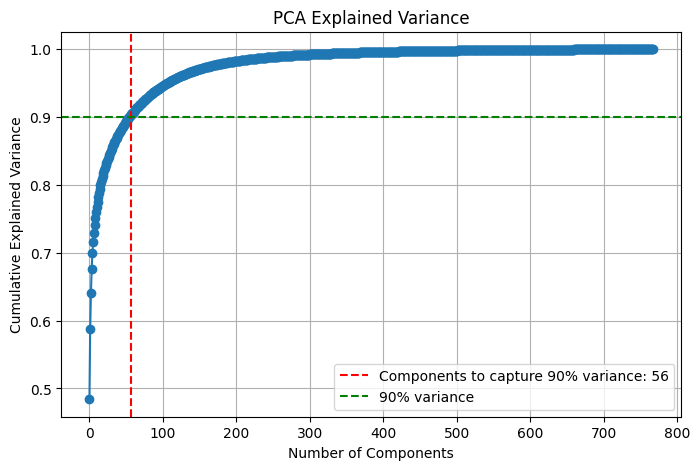

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA without specifying n_components to retain all components
pca = PCA()

# Fit PCA on the training data
pca.fit(X_train)

# Calculate the cumulative variance explained by the PCA components
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components just before reaching 90% variance
components_before_cutoff = np.argmax(cumulative_variance >= 0.9) + 1

# Print the component and variance explained around 90% variance
print(f"Number of components to capture 90% variance: {components_before_cutoff} | Variance explained: {cumulative_variance[components_before_cutoff - 1]*100:.2f}%")

# Plot the cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.axvline(x=components_before_cutoff, linestyle='--', color='r', label=f'Components to capture 90% variance: {components_before_cutoff}')
plt.axhline(y=0.9, linestyle='--', color='green', label='90% variance')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
# Apply PCA to the train and test set with the determined number of components
pca_90 = PCA(n_components=components_before_cutoff)

# Fit PCA on the training data
pca_90.fit(X_train)

# Transform both X_train and X_test using the fitted PCA model
X_train_pca = pca_90.transform(X_train)
X_test_pca = pca_90.transform(X_test)

print(f"Reduced feature set dimensions: {X_train_pca.shape}, {X_test_pca.shape}")

Reduced feature set dimensions: (2400, 56), (600, 56)


From 768 to 56 features

### Run

Both reduced and full features

In [ ]:
# Optimize hyperparameters for reduced features
pca_best_model, pca_best_params, pca_performance = optimize_hyperparameters(
    GradientBoostingClassifier, fixed_params, param_space,
    X_train_pca, y_train, X_test_pca, y_test,
    scoring='accuracy', n_trials=10
)

# Show performance
print("Best Parameters:", pca_best_params)
print("Model Performance:", pca_performance)

[I 2024-04-12 12:04:19,852] A new study created in memory with name: no-name-44fa4562-f757-406d-a205-fdf6e3718bc1
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
[I 2024-04-12 12:04:41,496] Trial 0 finished with value: 0.5850000000000001 and parameters: {'n_estimators': 80, 'learning_rate': 0.008404354022807462, 'max_depth': 24, 'min_samples_leaf': 54}. Best is trial 0 with value: 0.5850000000000001.
[I 2024-04-12 12:05:33,031] Trial 1 finished with value: 0.5887499999999999 and parameters: {'n_estimators': 112, 'learning_rate': 0.0026744953908689195, 'max_depth': 21, 'min_samples_leaf': 50}. Best is trial 1 with value: 0.5887499999999999.
[I 2024-04-12 12:06:25,819] Trial 2 finished with value: 0.5762500000000002 and parameters: {'n_estimators': 170, 'learning_rate': 0.0015310

Best Parameters: {'n_estimators': 152, 'learning_rate': 0.04806844533280584, 'max_depth': 4, 'min_samples_leaf': 67}
Model Performance: {'accuracy': 0.6166666666666667, 'precision': 0.6267605633802817, 'recall': 0.5894039735099338, 'f1_score': 0.6075085324232082, 'roc_auc_score': 0.6564958442597449}


In [ ]:
# Optimize hyperparameters for reduced features
best_model, best_params, performance = optimize_hyperparameters(
    GradientBoostingClassifier, fixed_params, param_space,
    X_train, y_train, X_test, y_test,
    scoring='accuracy', n_trials=10
)

# Show performance
print("Best Parameters:", best_params)
print("Model Performance:", performance)

[I 2024-04-12 12:20:19,011] A new study created in memory with name: no-name-ef8d8fcc-b7f7-4c41-b62d-b65fab72a229
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
[I 2024-04-12 12:31:03,737] Trial 0 finished with value: 0.5991666666666667 and parameters: {'n_estimators': 111, 'learning_rate': 0.09076671457184783, 'max_depth': 9, 'min_samples_leaf': 53}. Best is trial 0 with value: 0.5991666666666667.
[I 2024-04-12 12:37:14,871] Trial 1 finished with value: 0.6058333333333333 and parameters: {'n_estimators': 72, 'learning_rate': 0.16139725131939023, 'max_depth': 17, 'min_samples_leaf': 58}. Best is trial 1 with value: 0.6058333333333333.
[I 2024-04-12 12:45:18,704] Trial 2 finished with value: 0.5945833333333332 and parameters: {'n_estimators': 63, 'learning_rate': 0.114765516081

Best Parameters: {'n_estimators': 79, 'learning_rate': 0.05002709566035094, 'max_depth': 16, 'min_samples_leaf': 61}
Model Performance: {'accuracy': 0.6066666666666667, 'precision': 0.6161971830985915, 'recall': 0.5794701986754967, 'f1_score': 0.5972696245733788, 'roc_auc_score': 0.6696519845326458}


### Add Results

As we can see, the full feature set is better, on the ROC score, so I choose to log that model's stats/

In [ ]:
# Match by the Feature set value
longformer_index = results_table[results_table['Feature set'] == 'Longformer'].index[0]
results_table.at[longformer_index, '# features in the final model'] = X_train.shape[1]
results_table.at[longformer_index, 'Accuracy score'] = performance['accuracy']
results_table.at[longformer_index, 'AUC score'] = performance['roc_auc_score']

# Show
results_table.head()

,Approach,Feature set,# features in the final model,Accuracy score,AUC score
0,data-driven,GloVe pre-trained,100,0.583333,0.622917
1,data-driven,Longformer,768,0.606667,0.669652
2,knowledge-driven,LIWC + SA,0,0.000000,0.000000
3,Hybrid,LIWC + SA + non-textual features,0,0.000000,0.000000


## LIWC + SA

### Data

In [ ]:
# Construct Columns
liwc_columns = [col for col in user_info.columns if col.startswith("liwc_")]
sa_columns = ['Polarity', 'Subjectivity', 'NLTK_Compound']
features = liwc_columns + sa_columns

# Get Data
X = user_info[features]
y = user_target['profile_ope_hl_bol']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.head()

,liwc_Analytic,liwc_Clout,liwc_Authentic,liwc_Tone,liwc_WPS,liwc_Sixltr,liwc_Dic,liwc_function.,liwc_pronoun,liwc_ppron,...,liwc_QMark,liwc_Exclam,liwc_Dash,liwc_Quote,liwc_Apostro,liwc_Parenth,liwc_OtherP,Polarity,Subjectivity,NLTK_Compound
0,44.79,64.77,37.40,46.21,7.66,13.39,80.21,47.35,15.48,11.04,...,3.14,3.72,1.83,4.70,2.81,1.70,1.63,0.019048,0.514286,-0.9848
1,50.24,80.95,52.74,99.00,13.18,12.81,88.97,50.46,15.38,10.83,...,0.19,3.03,0.59,0.44,1.70,0.78,3.00,0.327134,0.658176,1.0000
2,43.55,66.36,71.99,96.21,26.54,11.25,92.17,54.67,18.26,13.69,...,1.19,0.42,0.05,0.42,1.22,0.16,0.29,0.375970,0.597166,0.9997
3,18.23,63.91,73.89,62.69,20.36,9.23,91.50,55.94,22.10,16.48,...,0.51,5.76,0.54,0.45,4.29,0.00,0.71,0.110793,0.615387,0.9961
4,56.84,47.35,50.92,65.18,11.34,15.18,84.85,49.89,14.12,8.12,...,1.33,9.09,1.57,1.10,3.68,0.30,1.09,0.177180,0.544536,0.9995


In [ ]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: profile_ope_hl_bol, dtype: int64

### Run

In [ ]:
# Optimize Hyperparameters
best_model, best_params, performance = optimize_hyperparameters(
    GradientBoostingClassifier, fixed_params, param_space,
    X_train, y_train, X_test, y_test,
    scoring='accuracy', n_trials=10
)

# Print the best hyperparameters and model performance
print("Best Parameters:", best_params)
print("Model Performance:", performance)

[I 2024-04-12 14:26:40,793] A new study created in memory with name: no-name-03eb0778-d66a-4a2c-8ab5-72db372524ac
[I 2024-04-12 14:27:00,756] Trial 0 finished with value: 0.6045833333333334 and parameters: {'n_estimators': 31, 'learning_rate': 0.0016955615486188077, 'max_depth': 15, 'min_samples_leaf': 92}. Best is trial 0 with value: 0.6045833333333334.
[I 2024-04-12 14:27:59,127] Trial 1 finished with value: 0.6 and parameters: {'n_estimators': 65, 'learning_rate': 0.0018464603517054606, 'max_depth': 9, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.6045833333333334.
[I 2024-04-12 14:28:37,734] Trial 2 finished with value: 0.6537499999999999 and parameters: {'n_estimators': 85, 'learning_rate': 0.03712652262534679, 'max_depth': 8, 'min_samples_leaf': 98}. Best is trial 2 with value: 0.6537499999999999.
[I 2024-04-12 14:29:36,501] Trial 3 finished with value: 0.6204166666666666 and parameters: {'n_estimators': 104, 'learning_rate': 0.5881435135717178, 'max_depth': 6, 'min_samp

Best Parameters: {'n_estimators': 85, 'learning_rate': 0.03712652262534679, 'max_depth': 8, 'min_samples_leaf': 98}
Model Performance: {'accuracy': 0.645, 'precision': 0.6594982078853047, 'recall': 0.609271523178808, 'f1_score': 0.6333907056798623, 'roc_auc_score': 0.6953642384105959}


### Add Results

In [ ]:
# Match by the Feature set value
liwc_sa_index = results_table[results_table['Feature set'] == 'LIWC + SA'].index[0]
results_table.at[liwc_sa_index, '# features in the final model'] = X_train.shape[1]
results_table.at[liwc_sa_index, 'Accuracy score'] = performance['accuracy']
results_table.at[liwc_sa_index, 'AUC score'] = performance['roc_auc_score']

# Show
results_table.head()

,Approach,Feature set,# features in the final model,Accuracy score,AUC score
0,data-driven,GloVe pre-trained,100,0.583333,0.622917
1,data-driven,Longformer,768,0.606667,0.669652
2,knowledge-driven,LIWC + SA,95,0.645000,0.695364
3,Hybrid,LIWC + SA + non-textual features,0,0.000000,0.000000


## Longformer + LIWC + SA + non-textual features

### Data

In [ ]:
# Construct Columns
longformer_columns = [f'Longform({i})' for i in range(768)]
liwc_columns = [col for col in user_info.columns if col.startswith("liwc")]
sa_columns = ['Polarity', 'Subjectivity', 'NLTK_Compound']
features = longformer_columns + liwc_columns + sa_columns

# Get Data
X = user_info[features]
y = user_target['profile_ope_hl_bol']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.head()

,Longform(0),Longform(1),Longform(2),Longform(3),Longform(4),Longform(5),Longform(6),Longform(7),Longform(8),Longform(9),...,liwc_QMark,liwc_Exclam,liwc_Dash,liwc_Quote,liwc_Apostro,liwc_Parenth,liwc_OtherP,Polarity,Subjectivity,NLTK_Compound
0,0.024415,-0.073675,0.083832,0.037962,-0.147602,-0.168909,0.098059,0.011755,0.090692,0.022772,...,3.14,3.72,1.83,4.70,2.81,1.70,1.63,0.019048,0.514286,-0.9848
1,-0.005017,-0.091407,0.186433,0.423396,-0.018279,-0.253361,0.159522,0.104332,0.144955,0.147279,...,0.19,3.03,0.59,0.44,1.70,0.78,3.00,0.327134,0.658176,1.0000
2,-0.000704,-0.071087,0.166465,0.287548,0.003656,-0.173357,0.128514,0.095260,0.172120,0.030947,...,1.19,0.42,0.05,0.42,1.22,0.16,0.29,0.375970,0.597166,0.9997
3,-0.044506,-0.091669,0.147273,0.254693,-0.071697,-0.197370,0.189061,0.261237,0.146673,0.022440,...,0.51,5.76,0.54,0.45,4.29,0.00,0.71,0.110793,0.615387,0.9961
4,0.021190,-0.123137,0.174675,0.298595,-0.185639,-0.354375,0.186115,0.160282,0.151893,0.033991,...,1.33,9.09,1.57,1.10,3.68,0.30,1.09,0.177180,0.544536,0.9995


In [ ]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: profile_ope_hl_bol, dtype: int64

### Run

In [ ]:
# Optimize Hyperparameters
best_model, best_params, performance = optimize_hyperparameters(
    GradientBoostingClassifier, fixed_params, param_space,
    X_train, y_train, X_test, y_test,
    scoring='accuracy', n_trials=10
)

# Print the best hyperparameters and model performance
print("Best Parameters:", best_params)
print("Model Performance:", performance)

[I 2024-04-12 14:49:30,310] A new study created in memory with name: no-name-0c10e3a2-2c1b-4c7b-93de-23d7bc3a425a
[I 2024-04-12 14:54:18,658] Trial 0 finished with value: 0.63625 and parameters: {'n_estimators': 53, 'learning_rate': 0.004173613566715274, 'max_depth': 13, 'min_samples_leaf': 38}. Best is trial 0 with value: 0.63625.
[I 2024-04-12 15:17:06,062] Trial 1 finished with value: 0.6225 and parameters: {'n_estimators': 191, 'learning_rate': 0.004123963022918598, 'max_depth': 20, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.63625.
[I 2024-04-12 15:20:23,214] Trial 2 finished with value: 0.6525000000000001 and parameters: {'n_estimators': 57, 'learning_rate': 0.0268077156007946, 'max_depth': 10, 'min_samples_leaf': 85}. Best is trial 2 with value: 0.6525000000000001.
[I 2024-04-12 15:24:19,947] Trial 3 finished with value: 0.6529166666666666 and parameters: {'n_estimators': 60, 'learning_rate': 0.0551842559365557, 'max_depth': 16, 'min_samples_leaf': 75}. Best is trial 3

Best Parameters: {'n_estimators': 60, 'learning_rate': 0.0551842559365557, 'max_depth': 16, 'min_samples_leaf': 75}
Model Performance: {'accuracy': 0.6483333333333333, 'precision': 0.657439446366782, 'recall': 0.6291390728476821, 'f1_score': 0.6429780033840947, 'roc_auc_score': 0.6910751588959508}


### Add Results

In [ ]:
# Match by the Feature set value
longformer_liwc_sa_index = results_table[results_table['Feature set'] == 'LIWC + SA + non-textual features'].index[0]
results_table.at[longformer_liwc_sa_index, '# features in the final model'] = X_train.shape[1]
results_table.at[longformer_liwc_sa_index, 'Accuracy score'] = performance['accuracy']
results_table.at[longformer_liwc_sa_index, 'AUC score'] = performance['roc_auc_score']

# Show
results_table.head()

,Approach,Feature set,# features in the final model,Accuracy score,AUC score
0,data-driven,GloVe pre-trained,100,0.583333,0.622917
1,data-driven,Longformer,768,0.606667,0.669652
2,knowledge-driven,LIWC + SA,95,0.645000,0.695364
3,Hybrid,LIWC + SA + non-textual features,863,0.648333,0.691075


## Analysis

Overall, the Hybrid / knowledge-driven models performs the best. The LIWC and SA features seem to be the most important in predicting rhe openness score. It seems that knowledge-drive approaches outperform deep learning approaches in this task. This could be because GloVe and Longform vectors are meant to encode meaning of text, which is (although slightly related) different from personality type (i.e. any persoanlity type can express a certain meaning/subject). On the other hand, different personality types may be more well correlated to sentiments and the language features that are carefully captured by LIWC scores. For example, a more open person could be more likely to express a subjective or polarizing opinion than someone who is more reserved/not open.

## Save Results

In [ ]:
results_table.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Approach,Feature set,# features in the final model,Accuracy score,AUC score
0,data-driven,GloVe pre-trained,100,0.583333,0.622917
1,data-driven,Longformer,768,0.606667,0.669652
2,knowledge-driven,LIWC + SA,95,0.645000,0.695364
3,Hybrid,LIWC + SA + non-textual features,863,0.648333,0.691075


In [ ]:
%ls

Final/   Lab1/  Lab3/    Lab3.2_extra/  Lab4/        Lab5/
Finall/  Lab2/  Lab3.2/  Lab3_extra/    Lab4_extra/  Lab5_extra/


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Save Results
results_table.to_csv('Final/model_results_table.csv', index=False)

# Part 6: Unsupervised Learning

## LDA

### Imports

In [ ]:
import gensim
from gensim import corpora
from gensim.models.phrases import Phrases, Phraser
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

### Convert String Read to Array

In [ ]:
column = user_info['cleaned message tokens']
test = column[0]
print(test)
print(test[0:2])

['still', 'piss', 'eminem', 'wasnt', 'official', 'airplanes', 'recording', 'mv', 'chillin', 'like', 'villain', 'livah', 'omgpop', 'repomen', 'ad', 'think', 'put', 'cartoon', 'character', 'profile', 'picture', 'realize', 'would', 'absolutely', 'nothing', 'sais', 'shush', 'girl', 'shutcho', 'lip', 'dooo', 'helen', 'keller', 'talk', 'yo', 'hipz', 'know', 'much', 'facebook', 'bad', 'thing', 'skip', 'week', 'suicide', 'much', 'starcraft', 'beta', 'play', 'gimmeh', 'ign', 'let', 'roll', 'watch', 'grilled', 'cheesus', 'cry', 'lot', 'shit', 'cry', 'easily', 'get', 'nu', 'pic', 'white', 'wash', 'filipino', 'weeaboo', 'wear', 'purple', 'accident']
['


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import ast

# Now do with ast making token list
column = user_info['cleaned message tokens']
tokens_lists = column.apply(ast.literal_eval)
test = tokens_lists[0]
print(test)
print(test[0:2])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['still', 'piss', 'eminem', 'wasnt', 'official', 'airplanes', 'recording', 'mv', 'chillin', 'like', 'villain', 'livah', 'omgpop', 'repomen', 'ad', 'think', 'put', 'cartoon', 'character', 'profile', 'picture', 'realize', 'would', 'absolutely', 'nothing', 'sais', 'shush', 'girl', 'shutcho', 'lip', 'dooo', 'helen', 'keller', 'talk', 'yo', 'hipz', 'know', 'much', 'facebook', 'bad', 'thing', 'skip', 'week', 'suicide', 'much', 'starcraft', 'beta', 'play', 'gimmeh', 'ign', 'let', 'roll', 'watch', 'grilled', 'cheesus', 'cry', 'lot', 'shit', 'cry', 'easily', 'get', 'nu', 'pic', 'white', 'wash', 'filipino', 'weeaboo', 'wear', 'purple', 'accident']
['still', 'piss']


### Make Dictionary/Corpus

In [ ]:
# Make tokens
cleaned_message_tokens_str = user_info['cleaned message tokens']
cleaned_message_tokens = cleaned_message_tokens_str.apply(ast.literal_eval)
cleaned_message_tokens.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    [still, piss, eminem, wasnt, official, airplan...
1    [sing, today, little, nurvous, please, pray, s...
2    [wonderful, day, anderson, beat, good, beat, i...
3    [like, floor, hope, miss, little, bit, maybe, ...
4    [make, moolah, need, start, play, mafia, wars,...
Name: cleaned message tokens, dtype: object

In [ ]:
# Make Bigrams
bigram_phrases = Phrases(cleaned_message_tokens, min_count=5, threshold=10)
bigram = Phraser(bigram_phrases)
bigram_messages = [bigram[message] for message in cleaned_message_tokens]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create a dictionary representation of the documents
dictionary = Dictionary(bigram_messages)

# Filter out extremes to remove noise
dictionary.filter_extremes(no_below=20, no_above=0.3)  # Played with these until I got decent topics

# The final number of tokens in the dictionary
print(f"Number of unique tokens: {len(dictionary)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of unique tokens: 3039


In [ ]:
# Convert document into the BOW format
corpus = [dictionary.doc2bow(message) for message in bigram_messages]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Create Models

In [ ]:
# Compute coherence function
def compute_coherence_values(dictionary, corpus, texts, start=3, step=3, limit=9):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit+1, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics,
                             chunksize=1500, passes=20, iterations=400,
                             eval_every=None, random_state=100,
                             alpha='auto', eta='auto')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create Models
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=bigram_messages, start=3, step=3, limit=9)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Inspect Models

In [ ]:
def print_topics_and_coherence(model_list, coherence_values, num_words=10):
  for model, coherence_score in zip(model_list, coherence_values):
    print(f"\nModel Coherence Score: {coherence_score}")
    for i, topic in enumerate(model.show_topics(num_topics=-1, num_words=num_words)):
        print(f"Top words for topic {i}:")
        print(topic[1])  # Returns list (topic_id, topic_representation)
        print()
    print("-" * 100)  # Print a separator line for readability

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print
print_topics_and_coherence(model_list, coherence_values)


Model Coherence Score: 0.2912113637928231
Top words for topic 0:
0.017*"im" + 0.016*"lol" + 0.010*"home" + 0.009*"ready" + 0.008*"dont" + 0.008*"tomorrow" + 0.007*"tonight" + 0.007*"weekend" + 0.006*"wan_na" + 0.006*"sleep"

Top words for topic 1:
0.013*"god" + 0.008*"thank" + 0.007*"someone" + 0.007*"help" + 0.007*"give" + 0.007*"family" + 0.006*"great" + 0.005*"please" + 0.005*"let" + 0.005*"heart"

Top words for topic 2:
0.006*"watch" + 0.005*"could" + 0.005*"something" + 0.005*"wan_na" + 0.004*"sleep" + 0.004*"start" + 0.004*"ever" + 0.004*"feel_like" + 0.004*"even" + 0.004*"give"

----------------------------------------------------------------------------------------------------

Model Coherence Score: 0.3584080235247564
Top words for topic 0:
0.051*"im" + 0.026*"dont" + 0.023*"na" + 0.011*"cant" + 0.011*"lol" + 0.011*"wan_na" + 0.011*"haha" + 0.008*"ur" + 0.006*"ko" + 0.006*"dont_wan"

Top words for topic 1:
0.016*"someone" + 0.011*"put_status" + 0.011*"please" + 0.010*"repost"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Analysis**

**General Observations:** Across the models, there are tems for colloquial language such as ("im," "lol," "dont," "na") and social activities ("watch," "sleep," "weekend"). This makes sense because of the casual and social nature of a social network like Twitter.

**Model 1 (Coherence Score: 0.2912):** This model seems to capture general themes related to daily activities, personal values, and emotional expressions.

**Model 2 (Coherence Score: 0.3584):** This model introduces more specific themes, such as planning and anticipation ("ready," "tomorrow," "tonight"), and interpersonal interactions ("someone," "help," "please").

**Model 3 (Coherence Score: 0.3973):** This model shows a further refinement, with clearer themes around daily routines ("weekend," "class"), emotional expressions/values ("lol," "god," "heart"), and specific activities or states ("sleep," "watch," "school"). The inclusion of Farmville as an activity in is interesting as well.

**Best Model:** I choose model 3 as the best model because it has the highest coherence score, in addition to well-defined topics.

### Analyze Best Model

In [ ]:
# Select the model with the highest coherence score
best_score = max(coherence_values)
best_index = coherence_values.index(best_score)
best_lda_model = model_list[best_index]

# Print the selected model's details
print(f"Best Model: {best_index + 4} Topics, Coherence Score: {best_score}")

Best Model: 6 Topics, Coherence Score: 0.3973092094996584


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Prepare the visualization
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(best_lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print the selected model's details
print(f"Best Model: {best_index + 4} Topics, Coherence Score: {best_score}")

# Printing topics from the best model
topics = best_lda_model.show_topics(num_topics=-1, formatted=True)
for topic in topics:
    print(topic)

Best Model: 6 Topics, Coherence Score: 0.3973092094996584
(0, '0.058*"im" + 0.029*"dont" + 0.015*"lol" + 0.014*"na" + 0.014*"cant" + 0.012*"wan_na" + 0.007*"ur" + 0.007*"haha" + 0.007*"dont_know" + 0.006*"feel_like"')
(1, '0.016*"someone" + 0.012*"please" + 0.011*"http" + 0.010*"let" + 0.009*"repost" + 0.008*"help" + 0.008*"watch" + 0.007*"farmville" + 0.007*"see_many" + 0.007*"status"')
(2, '0.006*"something" + 0.006*"could" + 0.006*"watch" + 0.005*"feel_like" + 0.005*"even" + 0.004*"ever" + 0.004*"tell" + 0.004*"bad" + 0.004*"use" + 0.004*"someone"')
(3, '0.011*"great" + 0.011*"god" + 0.011*"family" + 0.010*"kid" + 0.009*"home" + 0.008*"weekend" + 0.007*"thank" + 0.007*"help" + 0.007*"morning" + 0.006*"enjoy"')
(4, '0.028*"lol" + 0.015*"wan_na" + 0.010*"baby" + 0.010*"sleep" + 0.009*"sick" + 0.009*"school" + 0.007*"girl" + 0.007*"haha" + 0.007*"night" + 0.006*"home"')
(5, '0.013*"wan_na" + 0.012*"ur" + 0.010*"da" + 0.008*"give" + 0.008*"god" + 0.008*"heart" + 0.007*"tell" + 0.007*"fu

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Labelling / Analysis**

With a coherence score of about 0.397, the best model includes 9 topics.

0. Daily Life & Mood: The words "im," "dont," "lol,", "feel_like", show frequent updates about personal moods, emotions, and everyday occurrences.

1. Social Requests & Activities: The words "someone," "please," "repost," show social interactions, requests for help, or calls for participation in activities.

2. Unsure : The words "watch," "could," "something," indicate discussions related to leisure time and watching content, but there seems to be a more well-defined case of this same topic below. Potentially, this topic could be more about asking for or giving reviews/recommendations.

3. Family & Weekend Plans: The Words "great," "family," "kid," "weekend," revolve around family life, weekend activities, and expressions of happiness with family.

4. Youth & School Life: The words "lol," "school," "sleep," reflecting the school experiences and youth activities/culture.

5. Desires & Strong Expressions: The words "wan_na," "ur," "heart,", "god" "fuck". "shit" capture desires, requests, and strong emotional expressions. Note that god is an emphasis term here, not relating to religion.

6. Nighttime & TV: The words "lol," "gon_na," "sleep," ,"watch" focus on staying in at night and wathcing tv / relaxing.

7. Aspirations & Reflections: The words "could," "hope," "heart,", "believe", suggest aspirations, hopeful sentiments, and reflective thoughts on life.

8. Anticipation & Planning: The words "tomorrow," "ready," "tonight," relate to planning and anticipating upcoming events.

Overall, with these labels for the topics, we are able to gain an understanding of the space of content in the Twitter status updates given to us, which can facilitate our personal knowledge of an NLP task, or later be integrated into a model pipeline.